#### <center> **UNIVERSITÉ DE BORDEAUX**  </center>  
#### <center> MASTER 1 - 2024/2025 </center>  
#### <center>UE analyse des données environnementales  </center>  
***
### Réalisé par :
Marwa Dades, Amélie de Maillard et Mathis Rita
### Encadrant :
Didier Swingedouw

## Important

**Malgré certains commentaires dans le dossier, les réponses aux questions ainsi que l'interprétation des résultats obtenus sont présentées en détail dans le rapport (PDF) que nous avons rédigé.**

Voici les librairies nécessaires pour la réalisation du projet, à exécuter pour que les codes fonctionnent.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

<h2 style="padding:16px; color:#FFF; background:#07D">Partie 1. Manipulation des données</h2>

# Importation des données
Données accessibles :
- Données simulées passées
- Données simulées futures
- Données observées passées
- Incertitude des données observées passées

Labels correspondants :
- Les noms (labels) des modèles climatiques
- Les dates (labels) passées recouvertes
- Les dates (labels) futures recouvertes


In [141]:
# Importation des données simulées et observées
matrix_1 = np.load('data/matrix_1.npy')
matrix_2 = np.load('data/matrix_2.npy')
matrix_3 = np.load('data/matrix_3.npy')
matrix_4 = np.load('data/matrix_4.npy')

# Importation des labels correspondants
label_models       = np.load('data/label_models.npy')
label_past_times   = np.load('data/label_past_times.npy')
label_future_times = np.load('data/label_future_times.npy')

# Exercice 1

Parmis les quatre matrices de données, il y a :
- une matrice de données simulant l'anomalie de température passée (data_simulated_past)
- une matrice de données simulant l'anomalie de température future (data_simulated_future)
- une matrice de données mesurant l'anomalie de température passée (data_observed_past)
- une matrice de données d'incertitude (écart type) de l'anomalie mesurée (data_observed_past_sigma)

**Retrouvez la correspondance avec les 4 matrices, et complétez ci-dessous.**


#### Pour pouvoir trouver la correspondance :

In [143]:
print(matrix_1.shape)
print(matrix_2.shape)
print(matrix_3.shape)
print(matrix_4.shape)
print(label_past_times.shape)
print(label_future_times.shape)

(25, 78)
(1, 172)
(25, 172)
(172,)
(172,)
(78,)


Alors on a donc :

In [145]:
data_simulated_past      = matrix_3
data_simulated_future    = matrix_1
data_observed_past       = matrix_2
data_observed_past_sigma = matrix_4

# Exercice 2

**Quels sont les noms des différents modèles climatiques ?**

In [147]:
label_models # les noms des différents modèles climatiques

array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR',
       'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2', 'CIESM', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CanESM5', 'EC-Earth3', 'FIO-ESM-2-0', 'GFDL-ESM4',
       'GISS-E2-1-G', 'INM-CM5-0', 'IPSL-CM6A-LR', 'KACE-1-0-G',
       'KIOST-ESM', 'MCM-UA-1-0', 'MIROC6', 'MRI-ESM2-0', 'NESM3',
       'TaiESM1', 'UKESM1-0-LL'], dtype='<U13')

# Exercice 3

**Quel est l'interval de temps passé simulé et observé ?**

**Quel est l'interval de temps futur simulé ?**

In [149]:
print(min(label_past_times))
print(max(label_past_times))

1850
2021


L'intervalle de temps passé simulé et observé est [1850, 2021]

In [151]:
print(min(label_future_times))
print(max(label_future_times))

2022
2099


L'intervalle de temps futur simulé est [2022, 2099]

On peut retrouver les intervalles comme ci-dessous :

In [153]:
label_past_times,label_future_times

(array(['1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857',
        '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865',
        '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873',
        '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881',
        '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889',
        '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897',
        '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905',
        '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913',
        '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921',
        '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929',
        '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937',
        '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945',
        '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953',
        '1954', '1955', '1956', '1957', '1958', '1959', '1960', 

# Exercice 4

**Affichez l'évolution de l'anomalie de température, pour les différents modèles climatiques, et pour les observations. Les simulations sont-elles cohérentes avec les observations ?**


**Affichez la série temporelle moyenne multi-modèle et son incertitude à un écart type (aide : fonction fill_between de matplotlib).**

**Affichez la série temporelle observée et son incertitude à un écart type (aide : fonction fill_between de matplotlib).**



#### Tracé de l'évolution de l'anomalie de température pour chaque modèle et pour les observations

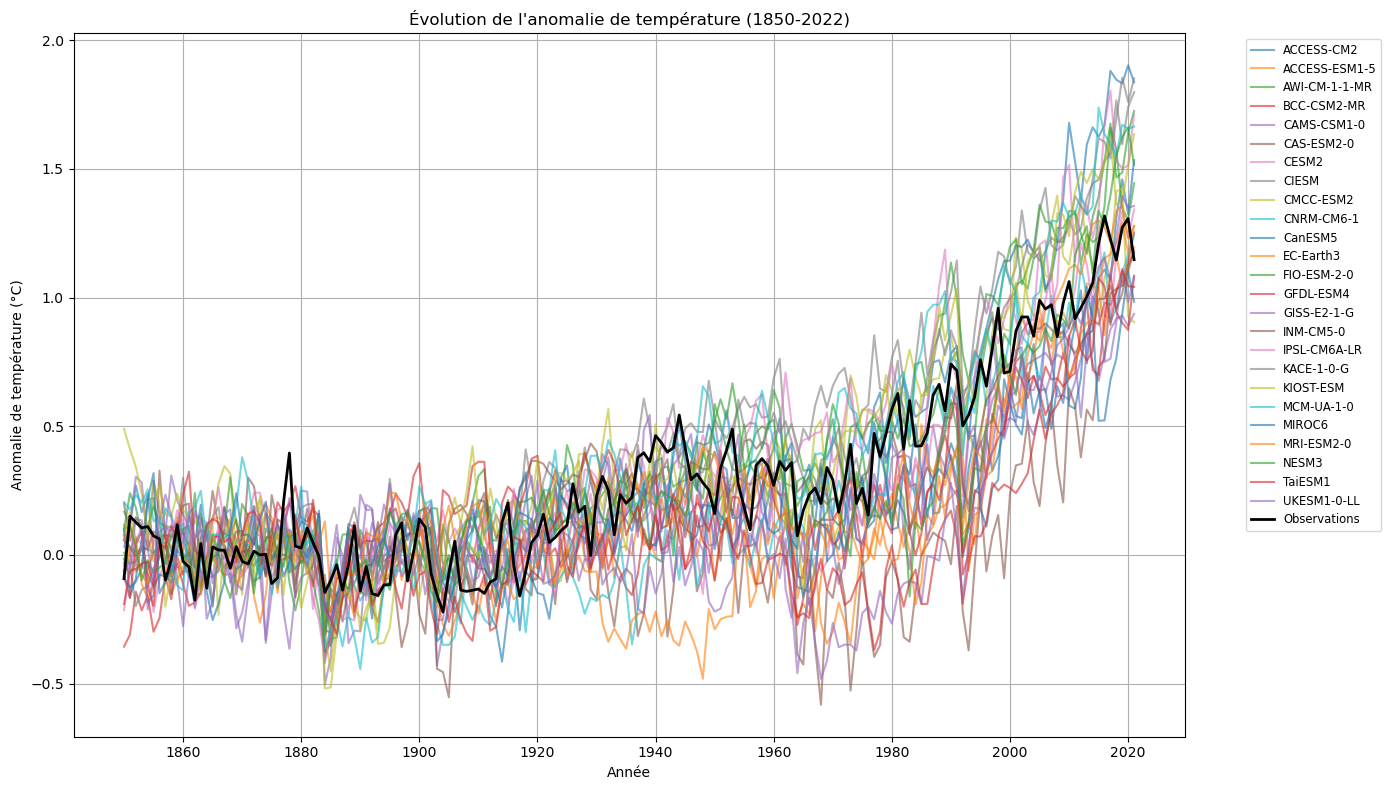

In [155]:
plt.figure(figsize=(14, 8))

# Pour chaque modèle, on trace la simulation passée
for i, model in enumerate(label_models):
    plt.plot(label_past_times, data_simulated_past[i], label=model, alpha=0.6)

# Tracé des observations
plt.plot(label_past_times,data_observed_past.T, label='Observations', color='black', linewidth=2)

# Mise en forme du graphique
plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.title('Évolution de l\'anomalie de température (1850-2022)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

On remarque que certaines simulations sont cohérentes avec les observations, mais on peut voir des écarts importants pour des simulations qui sont à prendre en compte. La courbe des observations reste centrées par rapport aux différentes simulations.

#### Tracé de la série temporelle moyenne multi-modèle et son incertitude à un écart type

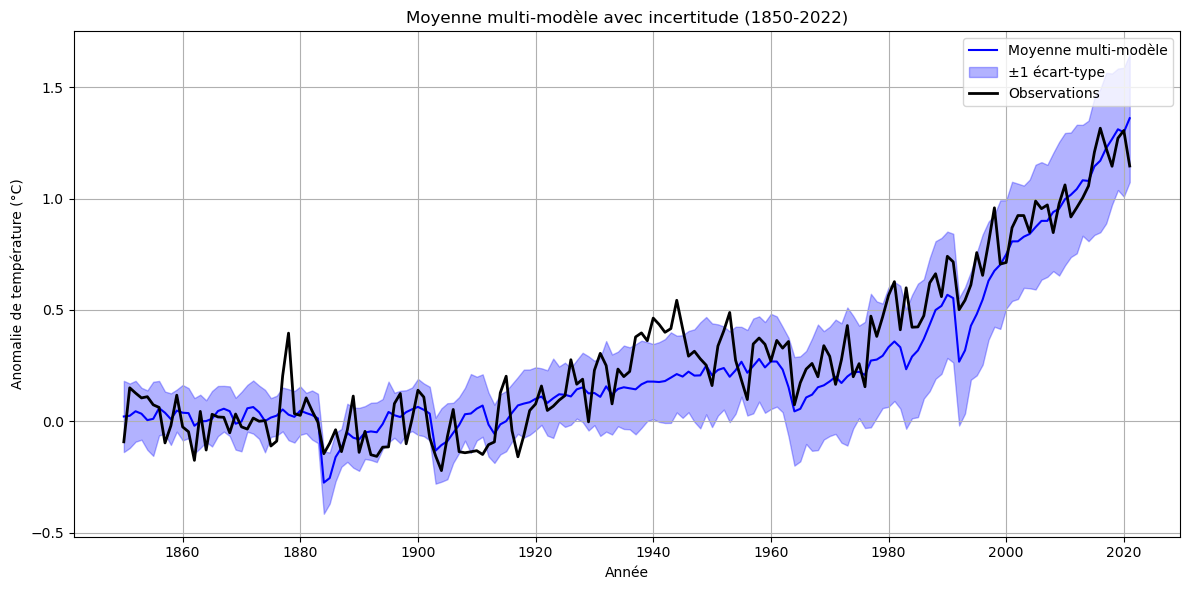

In [157]:
# Calcul de la moyenne et de l'écart-type entre modèles
mean_simulated_past = np.mean(data_simulated_past, axis=0)
std_simulated_past = np.std(data_simulated_past, axis=0)

# Tracé
plt.figure(figsize=(12, 6))

# Tracer la moyenne
plt.plot(label_past_times, mean_simulated_past, label='Moyenne multi-modèle', color='blue')

# Remplissage de l'incertitude ±1 écart-type
plt.fill_between(label_past_times,
                 mean_simulated_past - std_simulated_past,
                 mean_simulated_past + std_simulated_past,
                 color='blue', alpha=0.3, label='±1 écart-type')

# Tracer les observations
plt.plot(label_past_times, data_observed_past.T, label='Observations', color='black', linewidth=2)

# Mise en forme
plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.title('Moyenne multi-modèle avec incertitude (1850-2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Tracé la série temporelle observée et son incertitude à un écart type

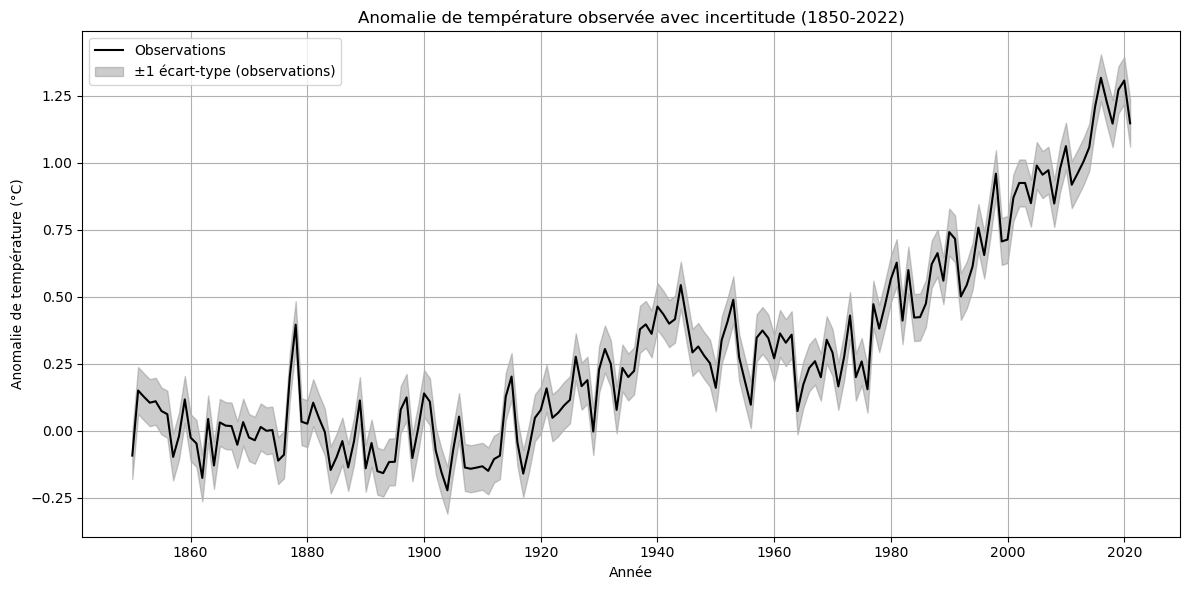

In [159]:
# Tracé de la série temporelle observée avec son incertitude

plt.figure(figsize=(12, 6))

# Tracer la série observée
plt.plot(label_past_times, data_observed_past.T, label='Observations', color='black')

# Remplissage de l'incertitude ±1 écart-type
plt.fill_between(label_past_times,
                 data_observed_past[0] - data_observed_past_sigma[0],
                 data_observed_past[0] + data_observed_past_sigma[0],
                 color='gray', alpha=0.4, label='±1 écart-type (observations)')

# Mise en forme
plt.xlabel('Année')
plt.ylabel('Anomalie de température (°C)')
plt.title('Anomalie de température observée avec incertitude (1850-2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
#plt.plot(data_simulated_past)

# Exercice 5
**Si on fait l'hypothèse que la distribution des données simulées suit une loi gaussienne, donnez les intervalles d'anomalie de température prédits en 2099 à 68%, 95% et 99%.**

In [161]:
# Convertir les années en entiers
years_future = label_future_times.astype(int) + 1970  # datetime64[Y] compte les années à partir de 1970 car nos données
# sont en datetime64[Y] et on les convertis en entiers

# Trouver l'index de 2099
index_2099 = np.where(years_future == 2099)[0][0]

# Récupérer les valeurs de l'anomalie de température prédite en 2099 pour tous les modèles
values_2099 = data_simulated_future[:, index_2099]

# Moyenne et écart-type
mean_2099 = np.mean(values_2099)
std_2099 = np.std(values_2099)

# Intervalles
interval_68 = (mean_2099 - 1*std_2099, mean_2099 + 1*std_2099)
interval_95 = (mean_2099 - 2*std_2099, mean_2099 + 2*std_2099)
interval_99 = (mean_2099 - 3*std_2099, mean_2099 + 3*std_2099)

# Affichage
print(f"En 2099 :")
print(f"  Intervalle à 68% : {interval_68}")
print(f"  Intervalle à 95% : {interval_95}")
print(f"  Intervalle à 99% : {interval_99}")

En 2099 :
  Intervalle à 68% : (4.399312584090046, 6.655969627658122)
  Intervalle à 95% : (3.2709840623060074, 7.78429814944216)
  Intervalle à 99% : (2.142655540521969, 8.9126266712262)


# Exercice 6
**Le dernier exercice supposait que la distribution des données simulées suit une loi gaussienne. Cette hypothèse est-elle vraie ?**

Pour vérifier que la distribution des données simulées suit une loi gaussienne, nous allons visualiser le QQ-plot qui permet de comparer la distribution empirique avec une vraie gaussienne.

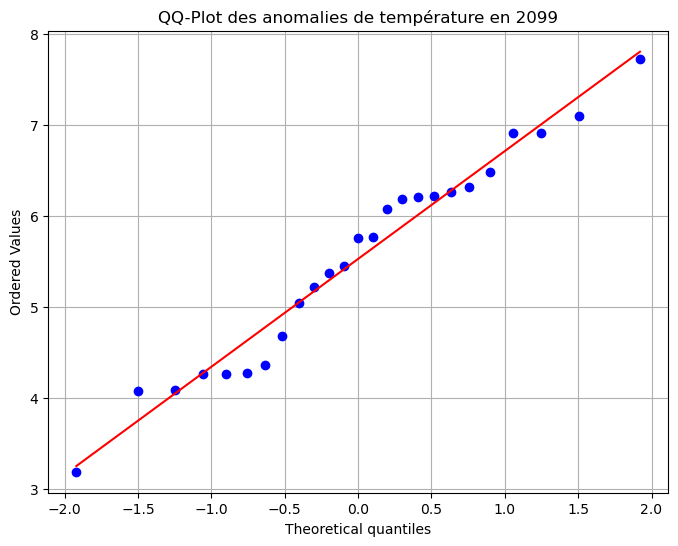

In [163]:
#QQ-plot
plt.figure(figsize=(8, 6))
stats.probplot(values_2099, dist="norm", plot=plt)
plt.title('QQ-Plot des anomalies de température en 2099')
plt.grid(True)
plt.show()

On voit grâce au QQ-plot que les points suivent la droite, donc les données simulées suivent une loi gaussienne.

Pour appuyer la valdidité de l'hypothèse, nous allons utiliser le test statistique de Shapiro-Wilk.

In [165]:
shapiro_test = stats.shapiro(values_2099)
print(f"Statistique de test Shapiro-Wilk : {shapiro_test.statistic:.4f}")
print(f"P-value : {shapiro_test.pvalue:.4f}")

# Interprétation
if shapiro_test.pvalue > 0.05:
    print("=> Hypothèse de normalité acceptée (données probablement normales)")
else:
    print("=> Hypothèse de normalité rejetée (données probablement non normales)")

Statistique de test Shapiro-Wilk : 0.9667
P-value : 0.5636
=> Hypothèse de normalité acceptée (données probablement normales)


On remarque que la p_valeur est supérieure à 0.05 (ici elle est égale à 0.5636) alors l’hypothèse de normalité est acceptée. Donc les données simulées suivent une loi gaussienne.

# Exercice 7
**Ces simulations correspondent toutes à un scénario SSP précis. Qu'est ce qu'un scénario SSP ? Pouvez vous trouver auquel ces simulations appartiennent ?**

#### Qu'est ce qu'un scénario SSP ?

Les scénarios SSP (Shared Socio-economic Pathways) sont des narratifs, traduits en ensembles d'hypothèses socio-économiques (Population, Éducation, Urbanisation, PIB).Ces narratifs décrivent des évolutions alternatives de la société future en l'absence de changement climatique ou de politique climatique. Cinq narratifs ont été construits par le GIEC, chacun étant numéroté de 1 à 5.

On retrouve les scénarios SSP suivants pour les changements climatique :
- **SSP1-1.9** et **SSP1-2.6** : scénarios optimistes, forte action climatique (baisse des émissions, réchauffement limité).
- **SSP2-4.5** : scénario "intermédiaire" (monde moyen, réchauffement modéré).
- **SSP3-7.0** : scénario pessimiste (conflits, peu de coopération, fortes émissions).
- **SSP5-8.5** : scénario catastrophe (économie fossile extrême, émissions très élevées).

Le second nombre (exemple : 2.6) correspond à l'augmentation d'énergie radiative (en $W/m^2$) attendue en 2100.

On a le tableau suivant qui correspond aux niveaux de réchauffement par scénario et par horizon (en °C, « best estimate ») :
<figure class="table"><table><tbody><tr><td>&nbsp;</td><td><strong>Court terme&nbsp;: 2021-2040</strong></td><td><strong>Moyen terme&nbsp;: 2041-2060</strong></td><td><strong>Long terme&nbsp;: 2081-2100</strong></td></tr><tr><td><strong>SSP1-1.9</strong></td><td>1,5</td><td>1,6</td><td>1,4</td></tr><tr><td><strong>SSP1-2.6</strong></td><td>1,5</td><td>1,7</td><td>1,8</td></tr><tr><td><strong>SSP2-4.5</strong></td><td>1,5</td><td>2,0</td><td>2,7</td></tr><tr><td><strong>SSP3-7.0</strong></td><td>1,5</td><td>2,1</td><td>3,6</td></tr><tr><td><strong>SSP5-8.5</strong></td><td>1,6</td><td>2,4</td><td>4,4</td></tr></tbody></table></figure>

Source : https://www.carbone4.com/publication-scenarios-ssp-adaptation

#### Pouvez vous trouver auquel ces simulations appartiennent ?

D'après les intervalles des anomalies des températures prédits en 2099 (cf. Exercice 5), en moyenne, nous avons des anomalies de températures prédites entre 4°C et 6°C sur le long terme. Ainsi, les simulations pourraient appartenir au scénario SSP5-8.5 qui considère des émissions de GES (gaz à effet de serre) très élevées.

# Exercice 8 : transformation du problème en univarié
Transformez le problème en univarié : on veut prédire l'anomalie moyenne entre 2090 et 2099, à partir de l'anomalie moyenne entre 1950 et 2000.

Construisez X_simu, Y_simu, et X_obs à partir des données, avec :
- X_simu (données simulées passées) de taille (M, 1) avec M modèles climatiques
- Y_simu (données simulées futures) de taille (M, 1)
- X_obs (données observées passées) de taille (1, 1)

Astuce : les type des listes label_past_times et label_future_times sont des datetime64[Y] numpy.

In [167]:
X_date_min = 1950
X_date_max = 2000

Y_date_min = 2090
Y_date_max = 2099

In [169]:
# Trouver les indices correspondant aux années dans les labels
idx_X = (label_past_times >= np.datetime64(f'{X_date_min}')) & (label_past_times <= np.datetime64(f'{X_date_max}'))
idx_Y = (label_future_times >= np.datetime64(f'{Y_date_min}')) & (label_future_times <= np.datetime64(f'{Y_date_max}'))

# Moyennes pour les modèles
X_simu = data_simulated_past[:, idx_X].mean(axis=1).reshape(-1, 1)  # (M, 1)
Y_simu = data_simulated_future[:, idx_Y].mean(axis=1).reshape(-1, 1)  # (M, 1)

# Moyenne pour les observations
X_obs = data_observed_past.squeeze()[idx_X].mean().reshape(1, 1)  # (1, 1)


print(f'X_simu shape: {X_simu.shape}')
print(f'Y_simu shape: {Y_simu.shape}')
print(f'X_obs shape: {X_obs.shape}')

X_simu shape: (25, 1)
Y_simu shape: (25, 1)
X_obs shape: (1, 1)


Nous avons extrait la moyenne de l'anomalie de température simulée entre 1950 et 2000 (passé) pour chaque modèle, ainsi que la moyenne simulée entre 2090 et 2099 (futur).
Nous avons également extrait la moyenne de l'anomalie observée entre 1950 et 2000 pour l'observation réelle.

# Question bonus :

**La moyenne multi modèle n'utilise que Y_simu. Son incertitude peut être calculée de facon empirique à partir de l'écart type de Y_simu. Que vaut cet écart type ?**


In [171]:
# Calcul de l'écart type empirique de Y_simu (incertitude multi-modèle)
std_Y_simu = np.std(Y_simu)
print(f"L'écart type empirique de Y_simu est : {std_Y_simu:.3f}")

L'écart type empirique de Y_simu est : 1.036


Ainsi nous avons une incertitude de 1.036°C autour de la moyenne des anomalies de température projetées pour 2099, selon les modèles simulés.

**Comment utiliser aussi X_simu ou encore X_obs pour diminuer l'incertitude ? Proposez différentes pistes et/ou testez les.**

Utiliser X_simu (les anomalies passées simulées) et X_obs (l'anomalie observée passée) peut permettre de diminuer l'incertitude dans les prévisions futures, surtout si on veut prendre en compte des relations entre les données passées et futures pour améliorer la prédiction des anomalies futures et réduire les erreurs.

- Utiliser X_simu et X_obs dans un modèle de régression multiple :

Nous pouvons modéliser une relation entre les anomalies passées (X_simu ou X_obs) et les anomalies futures (Y_simu), pour utiliser ces relations pour réduire l'incertitude de la prédiction des anomalies futures. La régression multiple permet de combiner plusieurs facteurs (X_simu, X_obs) pour prédire Y_simu.

- Faire une combinaison des modèles climatiques :

Nous pouvons pondérer les modèles en fonctions de leur performance. Nous pouvons pondérer les valeurs de Y_simu en fonction de leur précision passée sur les anomalies observées. Cela pourrait réduire l'incertitude. La pondération permet de donner plus de poids aux modèles les plus fiables et ainsi obtenir une prévision plus stable. Cela pourrait réduire l'incertitude en ne laissant pas les modèles moins fiables perturber la moyenne globale.

<h2 style="padding:16px; color:#FFF; background:#07D">Partie 2. Les méthodes permettant de réduire l'incertitude</h2>

Les données utilisées sont ceux de l'exercice 8 (de la partie 1).

## 2.1 Moyenne multi-modèles

**Quelle est la moyenne multi-modèle de Y et son incertitude à un écart type ? Cette incertitude sera la référence pour la suite : il faudra essayer de faire moins.**

In [173]:
# Moyenne multi-modèle
Y_mean = Y_simu.mean()

# Écart-type multi-modèle
Y_std = Y_simu.std()

print(f'Moyenne multi-modèle de Y : {Y_mean:.3f}')
print(f'Incertitude du modèle (1 écart-type) : {Y_std:.3f}')

Moyenne multi-modèle de Y : 5.221
Incertitude du modèle (1 écart-type) : 1.036


La moyenne multi-modèle égale à 5.221, représente une prévision globale des anomalies de température, qui réduit l'effet des divergences individuelles entre modèles.

L'incertitude égale à 1.036, représente la variabilité des différents modèles autour de cette moyenne.

## 2.2 Moyenne pondérée

**Implémentez la méthode de moyenne pondérée. Choissiez un paramétrage ($\sigma_D$, $\sigma_S$), et testez le.**

La moyenne pondérée permet de donner plus de poids à certains modèles climatiques en fonction de critères spécifiques, comme leur performance dans le passé (via un écart type de leurs prévisions, par exemple) ou d'autres facteurs. Cela permet de réduire l'incertitude en se basant plus fortement sur les modèles jugés les plus fiables.

La relation donnée pour calculer le poids est :
$$w_i =  \frac{exp(-\frac{D_i^2}{\sigma_D^2})}{1 + \sum_{j\neq i}^{M} exp(-\frac{S_{i,j}^2}{\sigma_S^2})}$$

où :
- $D_i = |X_i - X_0|$ : La distance entre le modèle $i$ et les observations $X_0$, ce qui mesure la performance du modèle par rapport aux données observées passées.
- $S_{i,j} = |X_i - X_j|$ : La distance entre les modèles $i$ et $j$, ce qui mesure leur indépendance.

$\sigma_D$ et $\sigma_S$ sont des paramètres de l'importance de la performance et de l'indépendance des modèles.
- $\sigma_D$ : Contrôle l'importance de la performance par rapport aux observations.
- $\sigma_S$ : Contrôle l'importance de l'indépendance entre les modèles.

On veut calculer les poids $w_i$ pour chaque modèle climatique en utilisant la relation donnée et utiliser ces poids pour calculer la moyenne pondérée des anomalies de température simulées futures.

In [175]:
# Choix des paramètres
sigma_D = 0.8
sigma_S = 0.2

M = X_simu.shape[0]  # nombre de modèles

# Calcul de D_i pour chaque modèle
D = np.abs(X_simu.squeeze() - X_obs.squeeze())

# Calcul de S_{i,j} pour tous les couples i, j
S = np.abs(X_simu - X_simu.T)  # (M, M)

# Calcul des poids non normalisés
numerateur = np.exp(- (D**2) / sigma_D**2)

denominateur = np.ones(M) + np.sum(np.exp(- (S**2) / sigma_S**2), axis=1) - np.exp(- (np.diag(S)**2) / sigma_S**2)
w = numerateur / denominateur

# Normalisation pour que la somme des poids soit 1
w /= w.sum()

# Estimateur de Y chapeau
Y_hat = np.sum(w.reshape(-1, 1) * Y_simu)  # scalaire

# Variance estimée
sigma_hat_squared = np.sum(w.reshape(-1, 1) * (Y_simu - Y_hat)**2)  # scalaire

sigma_hat = np.sqrt(sigma_hat_squared)

print(f'Y_chapeau : Moyenne pondérée des anomalies futures : {Y_hat:.3f}')
print(f'Incertitude associée : {sigma_hat:.3f}')

Y_chapeau : Moyenne pondérée des anomalies futures : 5.356
Incertitude associée : 1.030


Ici, la moyenne pondérée est une estimation plus robuste des anomalies futures, qui intègre à la fois la performance des modèles et leur indépendance.

**Comparez son incertitude avec celle obtenue avec la moyenne multi-modèles. Y-a-t-il une amélioration ?**

Les deux moyennes sont très proches (5.356 contre 5.141), donc la prévision centrale n'a pas énormément changé.
Cela est attendu car la moyenne pondérée donne plus de poids aux bons modèles, mais sans tout changer.

L'incertitude de la moyenne pondérée est plus petite (1.030 < 1.036).

On a une légère amélioration sur l'incertitude pour ce premier test de $(\sigma_D, \sigma_S)$.
Mais l'incertitude peut être impactée en fonction des valeurs de $\sigma_D$ et $\sigma_S$ choisies.

**Etudiez l’impact des paramètres sur la projection et son incertitude. Comment ne prendre en compte que le critère de performance, ou le critère d'indépendance ?**

Quand on change $\sigma_D$ ou $\sigma_S$, on modifie comment on choisit les modèles qu'on privilégies dans la moyenne pondérée :

<table>
  <tr>
    <th>Paramètre</th>
    <th>Interprétation</th>
    <th>Effet si petit</th>
    <th>Effet si grand</th>
  </tr>
  <tr>
    <td><code>\sigma_D</code></td>
    <td>Contrôle l'importance du critère de performance (proximité à l'observation)</td>
    <td>Fortement privilégier les modèles proches de l'observation</td>
    <td>Pratiquement tous les modèles sont considérés équivalents</td>
  </tr>
  <tr>
    <td><code>\sigma_S</code></td>
    <td>Contrôle l'importance du critère d'indépendance (diversité entre modèles)</td>
    <td>Privilégier les modèles indépendants (très différents des autres)</td>
    <td>Tous les modèles deviennent "indépendants"</td>
  </tr>
</table>

Pour ne prendre en compte qu'un seul critère on peut :

- Prendre uniquement la performance :

Nous pouvons mettre un $\sigma_S$ très grand (par ex. $\sigma_S = 10^6$). Ainsi, la dépendance entre les modèles devient négligeable.

- Prendre uniquement l'indépendance :

Nous pouvons mettre $\sigma_D$ très grand (par ex. $\sigma_D = 10^6$). Ainis, tous les modèles sont considérés "bons" vis-à-vis de l'observation (car $D_i^2/\sigma_D^2$ est presque à zéro) et la pondération dépend uniquement de la dispersion entre les modèles.


**Comment régler ces paramètres ? Proposez deux méthodes et testez les (astuce : si vous êtes en manque d'idée, vous pouvez vous pencher sur une méthode de validation croisée).**

Pour régler ces paramètres nous proposons deux méthodes :
- Méthode de validation croisée
- Fixation du $\sigma_D$ et variation du $\sigma_S$ et inversement, en regardant l'évolution de l'incertitude

#### Méthode de la validation croisée :

In [177]:
# Grilles de paramètres à tester
sigma_D_values = np.linspace(0.01, 10.0, 20, 100)
sigma_S_values = np.linspace(0.01, 10.0, 20, 100)

# Initialisation des matrices de résultats
error_val_matrix = np.zeros((len(sigma_D_values), len(sigma_S_values)))
sigma_hat_matrix = np.zeros((len(sigma_D_values), len(sigma_S_values)))
Y_hat_matrix = np.zeros((len(sigma_D_values), len(sigma_S_values)))

# Dimensions
M = X_simu.shape[0]

# Boucle sur tous les couples de (sigma_D, sigma_S)
for i, sigma_D in enumerate(sigma_D_values):
    for j, sigma_S in enumerate(sigma_S_values):

        # Validation Croisée
        errors = []
        for k in range(M):  # pour chaque modèle

            # Exclure le modèle k
            X_train = np.delete(X_simu, k, axis=0)
            Y_train = np.delete(Y_simu, k, axis=0)
            X_val = X_simu[k]
            Y_val = Y_simu[k]

            # Distances pour performance (par rapport à X_val)
            D = np.abs(X_train.squeeze() - X_val.squeeze())

            # Distances pour indépendance
            S = np.abs(X_train - X_train.T)

            # Poids non normalisés
            numerateur = np.exp(- (D**2) / sigma_D**2)
            denominateur = np.ones(M-1) + np.sum(np.exp(- (S**2) / sigma_S**2), axis=1) - np.exp(- (np.diag(S)**2) / sigma_S**2)
            w = numerateur / denominateur

            # Normalisation
            w /= w.sum()

            # Prédiction
            Y_pred = np.sum(w.reshape(-1, 1) * Y_train)

            # Erreur quadratique
            errors.append((Y_pred - Y_val)**2)

        # Stockage de l'erreur moyenne
        error_val_matrix[i, j] = np.mean(errors)

# Méthode de vailidation croisée : trouver (sigma_D, sigma_S) minimisant l'erreur
best_idx_val = np.unravel_index(np.argmin(error_val_matrix), error_val_matrix.shape)
best_sigma_D_val = sigma_D_values[best_idx_val[0]]
best_sigma_S_val = sigma_S_values[best_idx_val[1]]
best_error_val = error_val_matrix[best_idx_val]

print("\nMéthode Validation Croisée :")
print(f"Meilleur sigma_D = {best_sigma_D_val:.3f}, sigma_S = {best_sigma_S_val:.3f}")
print(f"Erreur de validation croisée minimale : {best_error_val:.4f}")


Méthode Validation Croisée :
Meilleur sigma_D = 0.536, sigma_S = 0.536
Erreur de validation croisée minimale : 1.1523


Cela veut dire que, si on enlève un modèle et on essaye de le prédire avec les autres, l'erreur moyenne est d’environ 1.15. C'est assez élevé, ce qui montre que les modèles sont assez différents entre eux (pas très faciles à prédire l'un à partir des autres).

#### Fixer sigma_D et faire varier sigma_S 

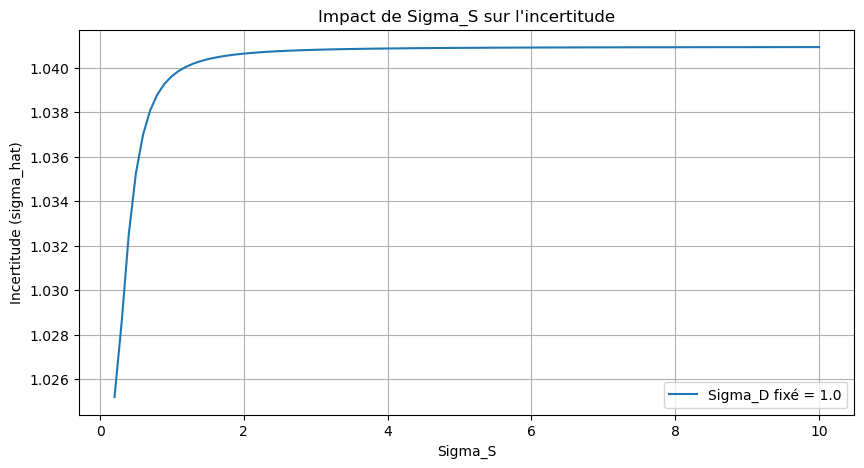

In [179]:
# Valeurs à tester
sigma_D_fixed = 1.0  # valeur choisie pour sigma_D
sigma_S_list = np.linspace(0.2, 10, 100)

# Résultats stockés
sigma_hat_list_S = []
Y_hat_list_S = []

for sigma_S in sigma_S_list:
    # Calcul des poids
    D = np.abs(X_simu.squeeze() - X_obs.squeeze())
    S = np.abs(X_simu - X_simu.T)

    numerateur = np.exp(- (D**2) / sigma_D_fixed**2)
    denominateur = np.ones(M) + np.sum(np.exp(- (S**2) / sigma_S**2), axis=1) - np.exp(- (np.diag(S)**2) / sigma_S**2)
    w = numerateur / denominateur
    w /= w.sum()

    # Estimation de Y
    Y_hat = np.sum(w.reshape(-1, 1) * Y_simu)
    sigma_hat_squared = np.sum(w.reshape(-1, 1) * (Y_simu - Y_hat)**2)
    sigma_hat = np.sqrt(sigma_hat_squared)

    sigma_hat_list_S.append(sigma_hat)
    Y_hat_list_S.append(Y_hat)

plt.figure(figsize=(10,5))
plt.plot(sigma_S_list, sigma_hat_list_S, label=f'Sigma_D fixé = {sigma_D_fixed}')
plt.xlabel('Sigma_S')
plt.ylabel('Incertitude (sigma_hat)')
plt.title('Impact de Sigma_S sur l\'incertitude')
plt.legend()
plt.grid()
plt.show()

#### Fixer sigma_S et faire varier sigma_D

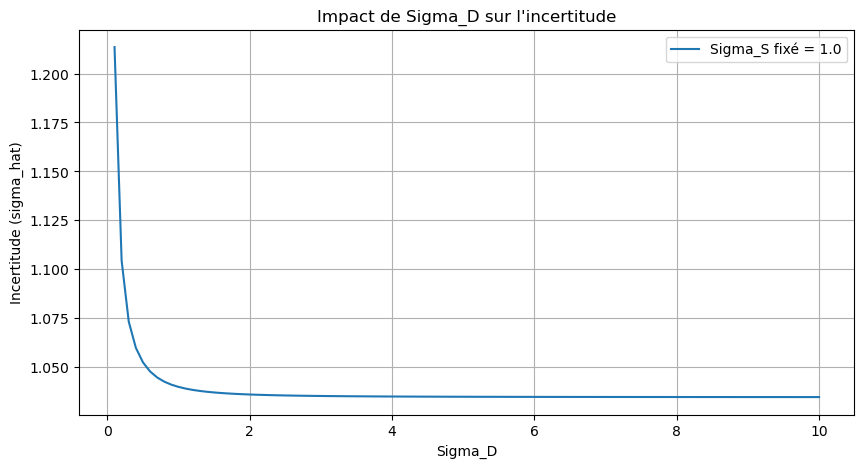

In [181]:
# Valeurs à tester
sigma_S_fixed = 1.0  # valeur choisie pour sigma_S
sigma_D_list = np.linspace(0.1, 10, 100)

# Résultats stockés
sigma_hat_list_D = []
Y_hat_list_D = []

for sigma_D in sigma_D_list:
    # Calcul des poids
    D = np.abs(X_simu.squeeze() - X_obs.squeeze())
    S = np.abs(X_simu - X_simu.T)

    numerateur = np.exp(- (D**2) / sigma_D**2)
    denominateur = np.ones(M) + np.sum(np.exp(- (S**2) / sigma_S_fixed**2), axis=1) - np.exp(- (np.diag(S)**2) / sigma_S_fixed**2)
    w = numerateur / denominateur
    w /= w.sum()

    # Estimation de Y
    Y_hat = np.sum(w.reshape(-1, 1) * Y_simu)
    sigma_hat_squared = np.sum(w.reshape(-1, 1) * (Y_simu - Y_hat)**2)
    sigma_hat = np.sqrt(sigma_hat_squared)

    sigma_hat_list_D.append(sigma_hat)
    Y_hat_list_D.append(Y_hat)

plt.figure(figsize=(10,5))
plt.plot(sigma_D_list, sigma_hat_list_D, label=f'Sigma_S fixé = {sigma_S_fixed}')
plt.xlabel('Sigma_D')
plt.ylabel('Incertitude (sigma_hat)')
plt.title('Impact de Sigma_D sur l\'incertitude')
plt.legend()
plt.grid()
plt.show()

D'après les deux graphiques ci-dessus, on remarque que la meilleure incertitude est trouvée en prenant un $\sigma_D$ élevée et un $\sigma_S$ assez faible. Sur le deuxième graphique, on peut voir que la meilleure incertitude de la moyenne pondérée est bien inférieure à 1.050.

## 2.3 Régression linéaire

**Réalisez une régression linéaire entre X et Y sur les données simulées, puis prédire à partir de l’observation.**

Prédiction des anomalies futures par régression linéaire : 5.298
Incertitude sur les prédictions (1-sigma) : 1.097


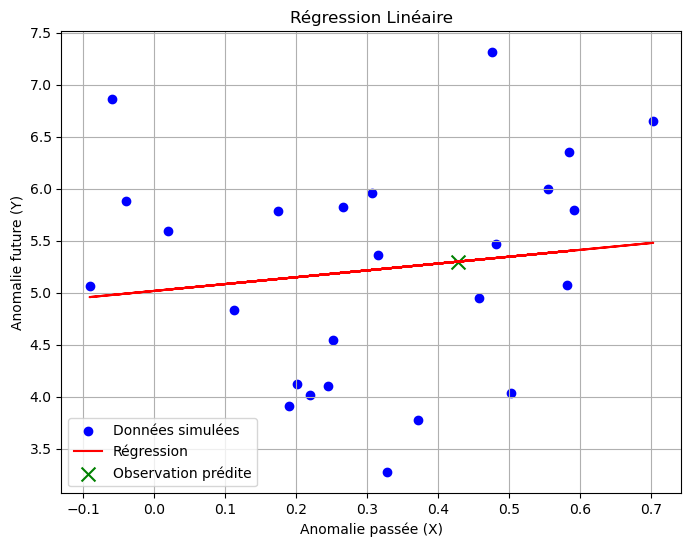

In [183]:
# Régression
reg = LinearRegression()
reg.fit(X_simu, Y_simu) # Apprentissage sur les données simulées
Y_pred_simu = reg.predict(X_simu)

# Prédiction sur l'observation
Y_obs_pred = reg.predict(X_obs)

# Nombre de points
M = len(X_simu)

# Moyenne des X
X_mean = np.mean(X_simu)
S_xx = np.sum((X_simu - X_mean)**2)

# Résidus et variance résiduelle (s^2)
residuals = Y_simu - Y_pred_simu
s_squared = np.sum(residuals**2) / (M - 2)

# Calcul de la variance de prédiction
X0 = X_obs[0][0]
var_pred = s_squared * (1 + (1/M) + ((X0 - X_mean)**2) / S_xx)
std_pred = np.sqrt(var_pred)

# Affichage
print(f"Prédiction des anomalies futures par régression linéaire : {Y_obs_pred[0][0]:.3f}")
print(f"Incertitude sur les prédictions (1-sigma) : {std_pred:.3f}")

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_simu, Y_simu, color='blue', label='Données simulées')
plt.plot(X_simu, reg.predict(X_simu), color='red', label='Régression')
plt.scatter(X_obs, Y_obs_pred, color='green', label='Observation prédite', marker='x', s=100)
plt.xlabel('Anomalie passée (X)')
plt.ylabel('Anomalie future (Y)')
plt.legend()
plt.title('Régression Linéaire')
plt.grid()
plt.show()

On a une prédiction de 5.298 qui correspond à la prévision de l'anomalie de température avec le modèle linéaire.

**Comparez son incertitude avec celle obtenue avec la moyenne multi-modèles. Y-a-t-il une amélioration ?**

On a une incertitude de 1.097, elle est un peu plus élevée que l'incertitude de la moyenne multi-modèles (1.036). Alors il n'y a pas d'amélioration de l'incertitude sans doute à cause de la non linéarité des données.

**Interpréter les coefficients de la régression linéaire. Que signifient-ils ?**

In [185]:
print(f"Coefficient directeur (pente) : {reg.coef_[0][0]:.3f}")
print(f"Ordonnée à l'origine : {reg.intercept_[0]:.3f}")

Coefficient directeur (pente) : 0.658
Ordonnée à l'origine : 5.017


Nous avons le modèle estimé suivant :
$$ Y = 0.6575 X + 5.0174$$
où :
- $X$ = anomalie passée (entre 1950–2000)
- $Y$ = anomalie future (2090–2099)

L'ordonée à l'orginie = 5.017 signifie que même si dans le passé il n'y avait aucune anomalie par rapport à la normale (0°C), on attendrait déjà +5°C d'anomalie future autour de 2090–2099. Cela reflète une augmentation structurelle forte des anomalies futures par rapport au passé.

De plus, le coefficient directeur (pente) = 0.658 signifie que chaque degré supplémentaire d'anomalie passée est associé à une hausse de 0.66°C de l'anomalie future.

Alors, les futurs climats sont globalement beaucoup plus chauds, indépendamment du passé et les différences entre modèles dans le passé décroient dans le futur, il y a un effet de convergence des modèles climatiques vers des scénarios de réchauffement fort.

**La qualité de régression est-elle bonne ? Appuyez vous sur une métrique pour répondre à cette  question**

Pour savoir si la régression est bonne nous allons nous baser sur la métrique standard en régression linéaire le coefficient de détermination $R^2$.

$$R^2 = 1 - \frac{\text{Variance des résidus}}{\text{Variance totale}}$$

- Si $R^2 = 1$ la régression est parfaite (les points sont exactement sur la droite).
- Si $R^2 = 0$ la régression n'explique rien (elle ne fait pas mieux qu'une moyenne).
- Un $R^2$ proche de 1 indique une bonne qualité de régression.

In [187]:
# Sur les données simulées
Y_pred_simu = reg.predict(X_simu)
r2 = r2_score(Y_simu, Y_pred_simu)

print(f"Coefficient de détermination R² : {r2:.3f}")

Coefficient de détermination R² : 0.019


Le coefficient de détermination est égale à $R^2\simeq 0.019$, ce qui indique que la régression linéaire explique 1,9% de la variance des anomalies des températures future. Par conséquent, la qualité de la régression est mauvaise.

Cela se voyait depuis le début par rapport à notre nuage de points entre les données simulées passées et futures. On voit que les points (représentant les données simulés) sont tres dispersés, alors il n'existe pas de dépendance linéaire entre les données simulées passées et futures, ce qui explique que le $R^2$ soit si petit.

## 2.4 One-step Kalman

**Implémentez et testez cette méthode pour estimer la projection.**

In [189]:
# Calcul des moyennes et écarts types
mu_X = np.mean(X_simu)
mu_Y = np.mean(Y_simu)
sigma_X = np.std(X_simu)
sigma_Y = np.std(Y_simu)

# Estimation de la corrélation rho
rho = np.corrcoef(X_simu.flatten(), Y_simu.flatten())[0, 1]

#  Bruit d'observation
# Ici on suppose que l'incertitude sur X_obs est sigma_B = data_observed_past_sigma moyenne sur 1950-2000
# (attention à bien prendre la moyenne sur les bonnes années)
sigma_B = data_observed_past_sigma.mean()

# Calcul de Y_chapeau (projection)
X0 = X_obs[0, 0]  # l'observation
gain = rho * sigma_Y * sigma_X / (sigma_X**2 + sigma_B**2)
Y_chapeau = mu_Y + gain * (X0 - mu_X)

# Calcul de l'incertitude
sigma_hat_squared = (1 - rho**2 / (1 + sigma_B**2 / sigma_X**2)) * sigma_Y**2
sigma_hat = np.sqrt(sigma_hat_squared)

# Affichage
print(f"Y_chapeau : Projection One-Step Kalman des anomalies futures : {Y_chapeau:.3f}")
print(f"Incertitude associée (sigma_hat) : {sigma_hat:.3f}")

Y_chapeau : Projection One-Step Kalman des anomalies futures : 5.294
Incertitude associée (sigma_hat) : 1.027


**Comparez son incertitude avec celle obtenue avec la moyenne multi-modèles. Y-a-t-il une amélioration ?**

La méthode One-Step Kalman réduit légèrement l'incertitude de projection par rapport à la moyenne multi-modèles, passant de 1.036 à 1.027. Alors, il y a une amélioration même si celle-ci est modeste.

**En se basant sur la relation théorique, comment évolue l’incertitude en fonction de la corrélation ? Comment évolue l’incertitude en fonction du rapport signal bruit ?**

L'incertitude vaut :
$$\sqrt{\hat{\sigma}^2}= \sqrt{Var(Y|X0)} = \sqrt{\left(1- \frac{\rho^2}{1+ \frac{\sigma_B^2}{\sigma_X^2}}\right)\sigma_Y^2}$$

avec :
- $\rho$ la corrélation entre $X$ et $Y$
- $\sigma_B$ l'incertitude sur l'observation $X_0$ (bruit)
- $\sigma_X$ la variabilité des modèles simulés
- $\sigma_Y$ écart-type des anomalies futures simulées (utilisé comme référence)

On a alors les effets de la corrélations $\rho$ sur l'incertitude suivantes :
- Si $\rho \longrightarrow 1$ alors le temre $\rho^2$ devient proche de 1 et donc l'incertitude $\hat{\sigma}^2$ diminue.
- Si $\rho \longrightarrow 0$ alors l'incertitdue $\hat{\sigma}^2$ augmente.

Plus la corrélation entre le passé $X$ et le futur $Y$ est forte, plus la méthode de Kalman est efficace pour réduire l'incertitude.


Puis, nous avons les effets du rapport signal/bruit sur l'incertitude suivant :

Dans la formule nous avec le facteur $1+ \frac{\sigma_B^2}{\sigma_X^2}$ alors :
- Si le bruit $\sigma_B$ est faible (observation très précise) cela implique que $\sigma_B^2$ << $\sigma_X^2$ donc le dénominateur est proche de 1, $\rho^2$ est atténué et $\hat{\sigma}^2$ diminue, donc l'incertitude est réduite.
- Si le bruit $\sigma_B$ est grand (observation peu fiable) cela implique que $\sigma_B^2$ >> $\sigma_X^2$ donc le dénominateur devient grand, on divise $\rho^2$ par un grand nombre alors $\hat{\sigma}^2$ augmente, donc l'incertitude est plus grande.

Plus l'observation est précise par rapport à la variabilité des modèles, plus l'incertitude est réduite.

Pour mieux comprendre voici un graphique représentant l'évolution de l'incertitude de la méthode Kalman en fonction de la corrélation.

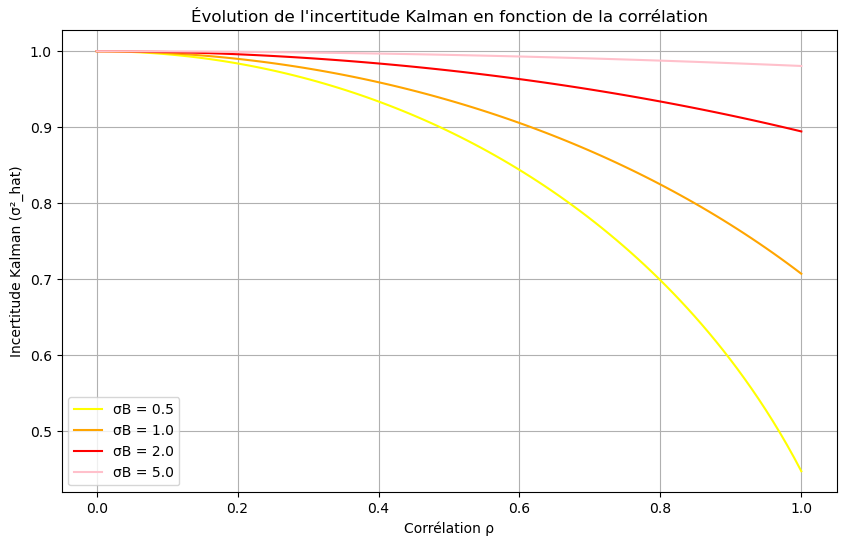

In [191]:
# Fixons les paramètres
sigma_Y = 1.0   # écart-type du Y simulé
sigma_X = 1.0   # écart-type du X simulé
sigma_B_values = np.array([0.5, 1, 2, 5])  # différents niveaux de bruit
rho_values = np.linspace(0, 1, 100)  # différentes valeurs de corrélation

# Fonction pour calculer l'incertitude Kalman
def kalman_uncertainty(rho, sigma_X, sigma_B, sigma_Y):
    ratio = sigma_B**2 / sigma_X**2
    return np.sqrt((1 - (rho**2) / (1 + ratio)) * sigma_Y**2)

uncertainty_curves = {}
for sigma_B in sigma_B_values:
    uncertainties = kalman_uncertainty(rho_values, sigma_X, sigma_B, sigma_Y)
    uncertainty_curves[sigma_B] = uncertainties

colors = ['yellow', 'orange', 'red', 'pink']

plt.figure(figsize=(10,6))
for (sigma_B, uncertainties), color in zip(uncertainty_curves.items(), colors):
    plt.plot(rho_values, uncertainties, label=f"σB = {sigma_B}", color=color)

plt.xlabel('Corrélation ρ')
plt.ylabel('Incertitude Kalman (σ²_hat)')
plt.title('Évolution de l\'incertitude Kalman en fonction de la corrélation')
plt.legend()
plt.grid(True)
plt.show()

On voit bien que :
- plus la corrélation $\rho$ est élevée plus l'incertitude $\hat{\sigma}$ diminue
- plus le bruit d'observation $\sigma_B$ est grand moins on arrive à réduire l'incertitude $\hat{\sigma}$.

De plus, voici un graphique représentant l'évolution de l'incertitude de la méthode de Kalman en fonction du bruit

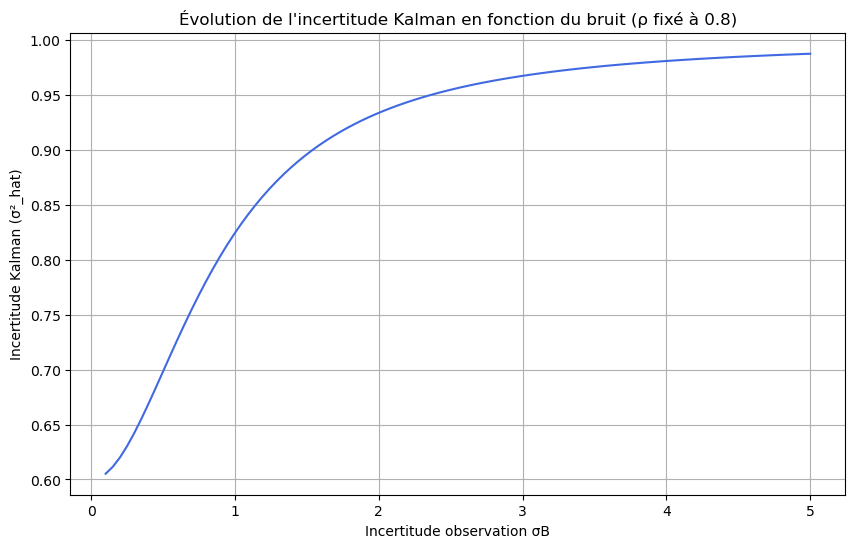

In [195]:
# On définit une nouvelle fois la fonction
def kalman_uncertainty(rho, sigma_X, sigma_B, sigma_Y):
    ratio = sigma_B**2 / sigma_X**2
    return np.sqrt((1 - (rho**2) / (1 + ratio)) * sigma_Y**2)

sigma_Y = 1.0
sigma_X = 1.0
rho_fixed = 0.8  # corrélation fixée

sigma_B_range = np.linspace(0.1, 5, 100)

uncertainty_vs_sigmaB = kalman_uncertainty(rho_fixed, sigma_X, sigma_B_range, sigma_Y)

plt.figure(figsize=(10,6))
plt.plot(sigma_B_range, uncertainty_vs_sigmaB, color='royalblue')
plt.xlabel('Incertitude observation σB')
plt.ylabel('Incertitude Kalman (σ²_hat)')
plt.title(f"Évolution de l'incertitude Kalman en fonction du bruit (ρ fixé à {rho_fixed})")
plt.grid(True)
plt.show()

On remarque alors très bien que lorsque le bruit d'observation $\sigma_B$ augmente, l'incertitude finale $\hat{\sigma}$ augmente aussi. Plus l'observation est bruitée, moins la méthode de Kalman arrive à corriger efficacement.

## 2.5 Comparaison moyenne multi-modèles, moyenne pondérée, régression  linéaire et Kalman

**Comparez et interpréter les performances des différentes méthodes.**

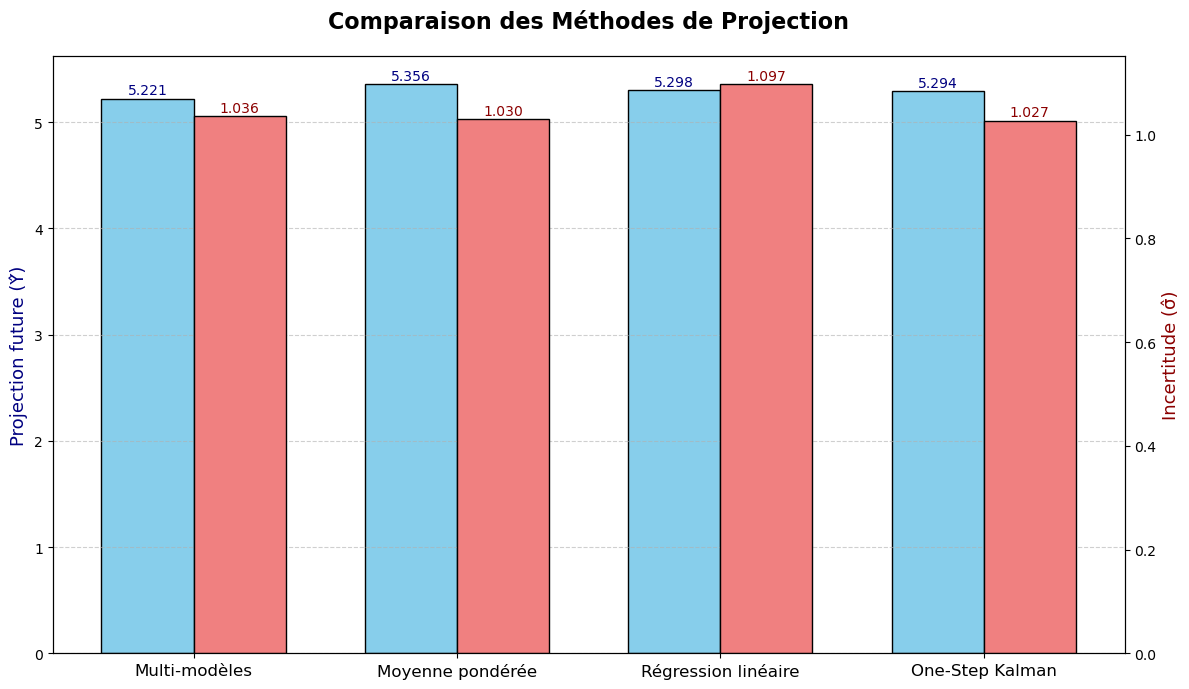

In [197]:
# Résultats
methods = ['Multi-modèles', 'Moyenne pondérée', 'Régression linéaire', 'One-Step Kalman']
Y_means = [5.221, 5.356, 5.298, 5.294]
sigmas = [1.036, 1.030, 1.097, 1.027]

x = np.arange(len(methods))
width = 0.35

# Création du graphique
fig, ax1 = plt.subplots(figsize=(12, 7))

# Barres pour Ŷ
bar1 = ax1.bar(x - width/2, Y_means, width, label='Projection (Ŷ)', color='skyblue', edgecolor='black')

# Axe secondaire pour l'incertitude
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, sigmas, width, label='Incertitude (σ̂)', color='lightcoral', edgecolor='black')

# Labels et titres
ax1.set_ylabel('Projection future (Ŷ)', fontsize=13, color='navy')
ax2.set_ylabel('Incertitude (σ̂)', fontsize=13, color='darkred')
ax1.set_xticks(x)
ax1.set_xticklabels(methods, fontsize=12)
ax1.set_title('Comparaison des Méthodes de Projection', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, axis='y', linestyle='--', alpha=0.6)

# Annotations pour les barres
for rect in bar1:
    height = rect.get_height()
    ax1.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width()/2, height),
                 xytext=(0,3), textcoords="offset points", ha='center', fontsize=10, color='navy')

for rect in bar2:
    height = rect.get_height()
    ax2.annotate(f'{height:.3f}', xy=(rect.get_x() + rect.get_width()/2, height),
                 xytext=(0,3), textcoords="offset points", ha='center', fontsize=10, color='darkred')

# Légendes
bars = bar1 + bar2
labels = ['Projection (Ŷ)', 'Incertitude (σ̂)']

plt.tight_layout()
plt.show()

Grâce à ce graphique nous pouvons comparer chacun des modèles. Pour cela, nous allons nous intéresser aux incertitudes.
En effet, nous remarquons que l'incertitude de référence de la moyenne multi-modèles est de 1.036. Le but, était de trouver, avec d'autres méthodes, une incertitude plus faible.

Nous avons donc commencé par la moyenne pondérée avec laquelle nous avons trouvé une incertitude de 1.030 qui est légèrement inférieure à celle de la moyenne multi-modèles. Cela peut s'expliquer par le choix des paramètres $\sigma_D$ et $\sigma_S$ qui impactent positivement la réduction de l'incertitude. En effet, en prenant des grandes valeurs de $\sigma_S$ et des petites valeurs de $\sigma_D$ l'incertitude augmenterait, et en prenant des petites valeurs de $\sigma_S$ et des grandes valeurs de $\sigma_D$ l'incertitude diminuerait.

Ensuite, nous avons continué le travail en implémentant la méthode de la régression linéaire avec laquelle nous trouvons une incertitude de 1.097, ce qui est plus élevée que la moyenne multi-modèles. Cela est dû à la non-linéarité des données.

Pour finir, nous avons implémenté la méthode One-step Kalman avec laquelle nous avons trouvé une incertitude de 1.027, ce qui est une incertitude améliorée par rapport à l'incertitdue de la moyenne multi-modèles. De plus, l'incertitude de la méthode de Kalman est la meilleure de toute les méthodes, cela implique qu'il y une approche robuste, surtout en présence d'erreurs dans les observations.

Donc, la méthode One-step Kalman est particulièrement intéressante car elle intègre directement les incertitudes dans son estimation. Et donc, si nous nous basons sur la réduction de l'incertitude, la méthode de Kalman est la meilleure.

**Quelles sont les différentes hypothèses faites au sein de chaque méthode sur la nature des données (linéarité, indépendance, gaussianité) ?  Un modèle qui simule mieux le passé est-il nécessairement un modèle qui simule mieux le futur ? Discutez des limites de ces différentes approches.**

cf. Rapport PDF

**Chaque méthode nécessite son lot de paramètres. Certains sont libres (par exemple $\sigma_S$ et $\sigma_D$), d'autres sont calculés par la méthode (par exemple $\beta_0$), ou encore calculés en amont sur les données (par exemple $\mu_X$ ou encore $\rho$).
Discutez de la robustesse de ces méthodes face à leurs paramétrisation, ainsi que des hypothèses nécessaires au calcul de leurs paramètres. Y-a-t-il un risque de surapprentissage ?**

cf. Rapport PDF

## 2.6 Validation croisée

**L’erreur théorique d’une méthode peut être différente de celle expérimentale calculée par validation croisée. Cependant, cette dernière se révèle très importante pour détecter la présence de sur-apprentissage, et/ou pour paramétrer une méthode. Il existe différentes approches de validation croisée, notamment les approches appelées Leave-One-Out (LOO) ainsi que K-fold. Le Leave-One-Out étant un cas particulier du K-fold.**

**Quel est le principe de fonctionnement de la validation croisée K-fold et Leave-One-Out ? Pourquoi permet-elle détecter la présence de sur
apprentissage ?**

cf. Rapport PDF

**Dans notre cas de figure où nous avons peu d'échantillons (modèles climatiques), il est préférable d'utiliser un Leave-One-Out plutôt qu'un K-fold. Pourquoi ?**

cf. Rapport PDF

**Utilisez une validation croisée de type Leave-One-Out pour calculer une erreur expérimentale par méthode. Comparez et expliquez ces performances.**

In [201]:
# Données déjà définies
M = X_simu.shape[0]
X0 = X_obs[0, 0]

# Conteneurs pour les erreurs
errors_mm = []
errors_pw = []
errors_lr = []
errors_kalman = []

# Paramètres fixes pour les méthodes qui en nécessitent
sigma_D = 0.8 # le même que celui prit dans implémentation de la moyenne pondérée
sigma_S = 0.2 # le même que celui prit dans implémentation de la moyenne pondérée
sigma_B = data_observed_past_sigma.mean()

for i in range(M):
    # Séparation entraînement / validation
    X_train = np.delete(X_simu, i, axis=0)
    Y_train = np.delete(Y_simu, i, axis=0)
    X_val = X_simu[i, 0]
    Y_val = Y_simu[i, 0]

    ### 1. Moyenne multi-modèle
    y_hat_mm = Y_train.mean()
    errors_mm.append((Y_val - y_hat_mm) ** 2)

    ### 2. Moyenne pondérée
    D_i = np.abs(X_train - X0)
    S_ij = np.abs(X_train - X_train.T)

    num = np.exp(-D_i**2 / sigma_D**2).flatten()
    denom = np.array([1 + np.sum(np.exp(-np.delete(np.abs(X_train[i] - X_train).flatten() ** 2, i) / sigma_S**2))
                      for i in range(M - 1)])

    w = num / denom
    w /= w.sum()

    y_hat_pw = np.sum(w.flatten() * Y_train.flatten())
    errors_pw.append((Y_val - y_hat_pw) ** 2)

    ### 3. Régression linéaire
    lr = LinearRegression().fit(X_train, Y_train)
    y_hat_lr = lr.predict([[X_val]])[0, 0]
    errors_lr.append((Y_val - y_hat_lr) ** 2)

    ### 4. Kalman
    mu_X, mu_Y = X_train.mean(), Y_train.mean()
    sigma_X, sigma_Y = X_train.std(), Y_train.std()
    rho = np.corrcoef(X_train.flatten(), Y_train.flatten())[0, 1]

    y_hat_kalman = mu_Y + (rho * sigma_Y / (sigma_Y**2 + sigma_B**2)) * (X_val - mu_X)
    errors_kalman.append((Y_val - y_hat_kalman) ** 2)

# Calcul RMSE (erreur quadratique moyenne)
rmse = lambda e: np.sqrt(np.mean(e))

print("Erreurs LOO (RMSE) par méthode :")
print(f" - Moyenne multi-modèle      : {rmse(errors_mm):.3f}")
print(f" - Moyenne pondérée          : {rmse(errors_pw):.3f}")
print(f" - Régression linéaire       : {rmse(errors_lr):.3f}")
print(f" - Kalman one-step           : {rmse(errors_kalman):.3f}")

Erreurs LOO (RMSE) par méthode :
 - Moyenne multi-modèle      : 1.079
 - Moyenne pondérée          : 1.082
 - Régression linéaire       : 1.118
 - Kalman one-step           : 1.085


Aucune méthode ne surpasse significativement les autres en termes d'erreur expérimentale, ce qui met en évidence la difficulté du problème et le faible nombre d’échantillons disponibles. La moyenne multi-modèle, bien que naïve, représente une base fiable. Les méthodes plus complexes (pondérée, régression, Kalman) n’offrent un réel avantage que lorsque leurs hypothèses sont bien adaptées aux données ou si l’on dispose d’un plus grand ensemble d'entraînement.

## 2.7 Modification du prédicteur $X$

#### 2.7.1  Autre prédicteur univarié

**Testez ces différentes méthodes pour d’autres prédicteurs $X$, par exemple un découpage plus récent (moyenne entre 2000-2015) ou encore un découpage plus ou moins restreint dans le temps (moyennage sur 10 ans vs moyennage sur 100 ans). Comment évoluent les performances ? Comment expliquez vous ces variations ?**

In [203]:
def compute_X(Y_data, years, start, end):
    """Calcule la moyenne sur la période [start, end]."""
    mask = (years >= start) & (years <= end)
    return Y_data[:, mask].mean(axis=1, keepdims=True)

# Définir les années correspondant aux colonnes
years = np.arange(1850, 2022)  # selon data_simulated_past

# Périodes à tester
time_windows = {
    "1850-1900": (1850, 1900),
    "1900-2000": (1900, 2000),
    "1950-2000": (1950, 2000),
    "1990-2000": (1990, 2000),
    "2000-2015": (2000, 2015),
}

# Conteneurs pour stocker incertitudes et prédictions
uncertainties = {}
predictions = {}

M = X_simu.shape[0]  # nombre de modèles
sigma_D = 0.8
sigma_S = 0.2
sigma_B = data_observed_past_sigma.mean()

for label, (start, end) in time_windows.items():
    X_simu_new = compute_X(data_simulated_past, years, start, end)
    X_obs_new = compute_X(data_observed_past, years, start, end)

    # Moyenne multi-modèle
    y_hat_mm = Y_simu.mean()
    unc_mm = np.std(Y_simu)

    # Moyenne pondérée
    D_i = np.abs(X_simu_new - X_obs_new)
    num = np.exp(-D_i**2 / sigma_D**2).flatten()
    denom = np.array([
        1 + np.sum(np.exp(-np.delete(np.abs(X_simu_new[i] - X_simu_new).flatten() ** 2, i) / sigma_S**2))
        for i in range(M)
    ])
    w = num / denom
    w /= w.sum()
    y_hat_pw = np.sum(w.flatten() * Y_simu.flatten())
    unc_pw = np.sqrt(np.sum(w.flatten() * (Y_simu.flatten() - y_hat_pw) ** 2))

    # Régression linéaire
    lr = LinearRegression().fit(X_simu_new, Y_simu)
    beta_0, beta_1 = lr.intercept_[0], lr.coef_[0][0]
    y_hat_lr = lr.predict(X_obs_new)[0, 0]

    X_mean = X_simu_new.mean()
    s_squared = np.mean((Y_simu - lr.predict(X_simu_new))**2)
    unc_lr = np.sqrt(s_squared * (
        1 + 1/M + ((X_obs_new[0,0] - X_mean)**2 / np.sum((X_simu_new - X_mean)**2))
    ))

    # Kalman one-step
    mu_X, mu_Y = X_simu_new.mean(), Y_simu.mean()
    sigma_X, sigma_Y = X_simu_new.std(), Y_simu.std()
    rho = np.corrcoef(X_simu_new.flatten(), Y_simu.flatten())[0, 1]
    ratio = sigma_B**2 / sigma_X**2
    y_hat_kalman = mu_Y + (rho * sigma_Y / (sigma_Y**2 + sigma_B**2)) * (X_obs_new[0, 0] - mu_X)
    unc_kalman = np.sqrt((1 - (rho**2 / (1 + ratio))) * sigma_Y**2)

    # Sauvegarder incertitudes et prédictions
    uncertainties[label] = {
        "multi-modèle": unc_mm,
        "pondérée": unc_pw,
        "régression": unc_lr,
        "kalman": unc_kalman
    }
    predictions[label] = {
        "multi-modèle": y_hat_mm,
        "pondérée": y_hat_pw,
        "régression": y_hat_lr,
        "kalman": y_hat_kalman
    }

# Affichage
print("\nIncertitudes par méthode et fenêtre :")
for periode, vals in uncertainties.items():
    print(f"\nFenêtre temporelle : {periode}")
    for method, sigma in vals.items():
        print(f" - {method} : Incertitude = {sigma:.3f}")

print("\nPrédictions Ŷ par méthode et fenêtre :")
for periode, vals in predictions.items():
    print(f"\nFenêtre temporelle : {periode}")
    for method, yhat in vals.items():
        print(f" - {method} : Ŷ = {yhat:.3f}")


Incertitudes par méthode et fenêtre :

Fenêtre temporelle : 1850-1900
 - multi-modèle : Incertitude = 1.036
 - pondérée : Incertitude = 1.036
 - régression : Incertitude = 1.044
 - kalman : Incertitude = 1.036

Fenêtre temporelle : 1900-2000
 - multi-modèle : Incertitude = 1.036
 - pondérée : Incertitude = 1.019
 - régression : Incertitude = 1.061
 - kalman : Incertitude = 1.036

Fenêtre temporelle : 1950-2000
 - multi-modèle : Incertitude = 1.036
 - pondérée : Incertitude = 1.030
 - régression : Incertitude = 1.053
 - kalman : Incertitude = 1.027

Fenêtre temporelle : 1990-2000
 - multi-modèle : Incertitude = 1.036
 - pondérée : Incertitude = 1.007
 - régression : Incertitude = 1.015
 - kalman : Incertitude = 0.989

Fenêtre temporelle : 2000-2015
 - multi-modèle : Incertitude = 1.036
 - pondérée : Incertitude = 1.006
 - régression : Incertitude = 0.945
 - kalman : Incertitude = 0.931

Prédictions Ŷ par méthode et fenêtre :

Fenêtre temporelle : 1850-1900
 - multi-modèle : Ŷ = 5.221

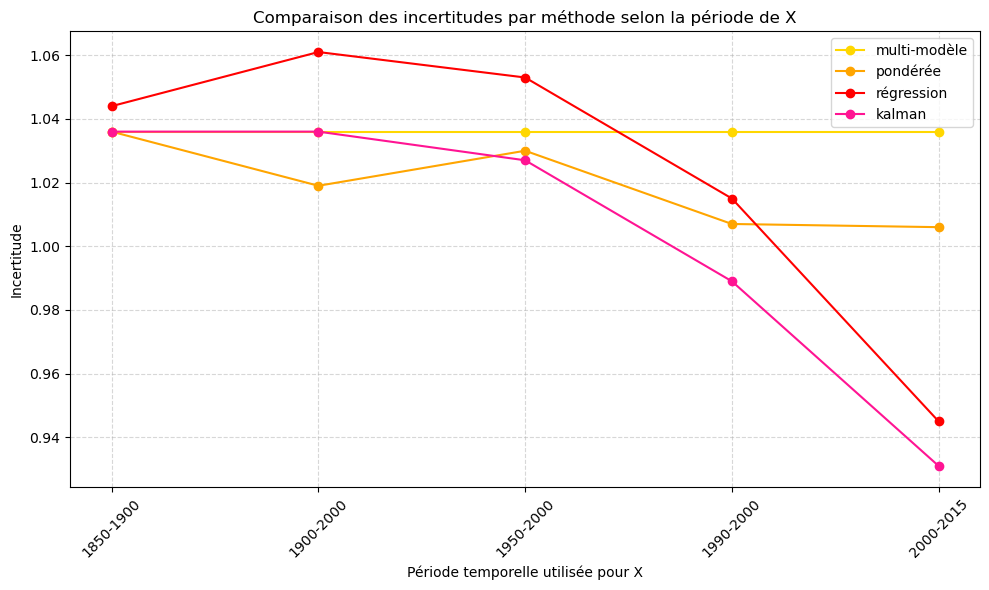

In [205]:
# Redéfinir le dictionnaire des incertitudes avec les résultats trouvées
example_uncertainties = {
    "1850-1900": {"multi-modèle": 1.036, "pondérée": 1.036, "régression": 1.044, "kalman": 1.036},
    "1900-2000": {"multi-modèle": 1.036, "pondérée": 1.019, "régression": 1.061, "kalman": 1.036},
    "1950-2000": {"multi-modèle": 1.036, "pondérée": 1.030, "régression": 1.053, "kalman": 1.027},
    "1990-2000": {"multi-modèle": 1.036, "pondérée": 1.007, "régression": 1.015, "kalman": 0.989},
    "2000-2015": {"multi-modèle": 1.036, "pondérée": 1.006, "régression": 0.945, "kalman": 0.931},
}

# Fenêtres et méthodes d'extraction
windows = list(example_uncertainties.keys())
methods = list(next(iter(example_uncertainties.values())).keys())

# Préparer les données pour le traçage
data = {method: [example_uncertainties[window][method] for window in windows] for method in methods}

custom_colors = ['gold', 'orange', 'red', 'deeppink']

# Graphique
plt.figure(figsize=(10, 6))
for method, color in zip(methods, custom_colors):
    plt.plot(windows, data[method], marker='o', label=method, color=color)

plt.title("Comparaison des incertitudes par méthode selon la période de X")
plt.ylabel("Incertitude")
plt.xlabel("Période temporelle utilisée pour X")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [207]:
# Périodes à tester
time_windows = {
    "1850-1900": (1850, 1900),
    "1900-2000": (1900, 2000),
    "1950-2000": (1950, 2000),
    "1990-2000": (1990, 2000),
    "2000-2015": (2000, 2015),
}

results = {}

for label, (start, end) in time_windows.items():
    X_simu_new = compute_X(data_simulated_past, years, start, end)
    X_obs_new = compute_X(data_observed_past, years, start, end)

    # Backup
    X_simu_backup = X_simu
    X_obs_backup = X_obs
    X_simu = X_simu_new
    X_obs = X_obs_new

    # Recalcul des erreurs LOO
    errors_mm, errors_pw, errors_lr, errors_kalman = [], [], [], []

    for i in range(M):
        X_train = np.delete(X_simu, i, axis=0)
        Y_train = np.delete(Y_simu, i, axis=0)
        X_val = X_simu[i, 0]
        Y_val = Y_simu[i, 0]

        # Moyenne multi-modèle
        y_hat_mm = Y_train.mean()
        errors_mm.append((Y_val - y_hat_mm) ** 2)

        # Moyenne pondérée
        D_i = np.abs(X_train - X_val)
        num = np.exp(-D_i**2 / sigma_D**2).flatten()
        denom = np.array([
            1 + np.sum(np.exp(-np.delete(np.abs(X_train[i] - X_train).flatten() ** 2, i) / sigma_S**2))
            for i in range(M - 1)
        ])
        w = num / denom
        w /= w.sum()
        y_hat_pw = np.sum(w.flatten() * Y_train.flatten())
        errors_pw.append((Y_val - y_hat_pw) ** 2)

        # Régression
        lr = LinearRegression().fit(X_train, Y_train)
        y_hat_lr = lr.predict([[X_val]])[0, 0]
        errors_lr.append((Y_val - y_hat_lr) ** 2)

        # Kalman
        mu_X, mu_Y = X_train.mean(), Y_train.mean()
        sigma_X, sigma_Y = X_train.std(), Y_train.std()
        rho = np.corrcoef(X_train.flatten(), Y_train.flatten())[0, 1]
        y_hat_kalman = mu_Y + (rho * sigma_Y / (sigma_Y**2 + sigma_B**2)) * (X_val - mu_X)
        errors_kalman.append((Y_val - y_hat_kalman) ** 2)

    # Calcul des RMSE
    rmse = lambda e: np.sqrt(np.mean(e))
    results[label] = {
        "multi-modèle": rmse(errors_mm),
        "pondérée": rmse(errors_pw),
        "régression": rmse(errors_lr),
        "kalman": rmse(errors_kalman)
    }

    # Restauration
    X_simu = X_simu_backup
    X_obs = X_obs_backup

# Affichage final
for periode, scores in results.items():
    print(f"\nFenêtre temporelle : {periode}")
    for method, score in scores.items():
        print(f" - {method} : RMSE = {score:.3f}")


Fenêtre temporelle : 1850-1900
 - multi-modèle : RMSE = 1.079
 - pondérée : RMSE = 1.079
 - régression : RMSE = 1.127
 - kalman : RMSE = 1.079

Fenêtre temporelle : 1900-2000
 - multi-modèle : RMSE = 1.079
 - pondérée : RMSE = 1.084
 - régression : RMSE = 1.124
 - kalman : RMSE = 1.086

Fenêtre temporelle : 1950-2000
 - multi-modèle : RMSE = 1.079
 - pondérée : RMSE = 1.082
 - régression : RMSE = 1.118
 - kalman : RMSE = 1.085

Fenêtre temporelle : 1990-2000
 - multi-modèle : RMSE = 1.079
 - pondérée : RMSE = 1.060
 - régression : RMSE = 1.072
 - kalman : RMSE = 1.067

Fenêtre temporelle : 2000-2015
 - multi-modèle : RMSE = 1.079
 - pondérée : RMSE = 1.045
 - régression : RMSE = 1.016
 - kalman : RMSE = 1.042


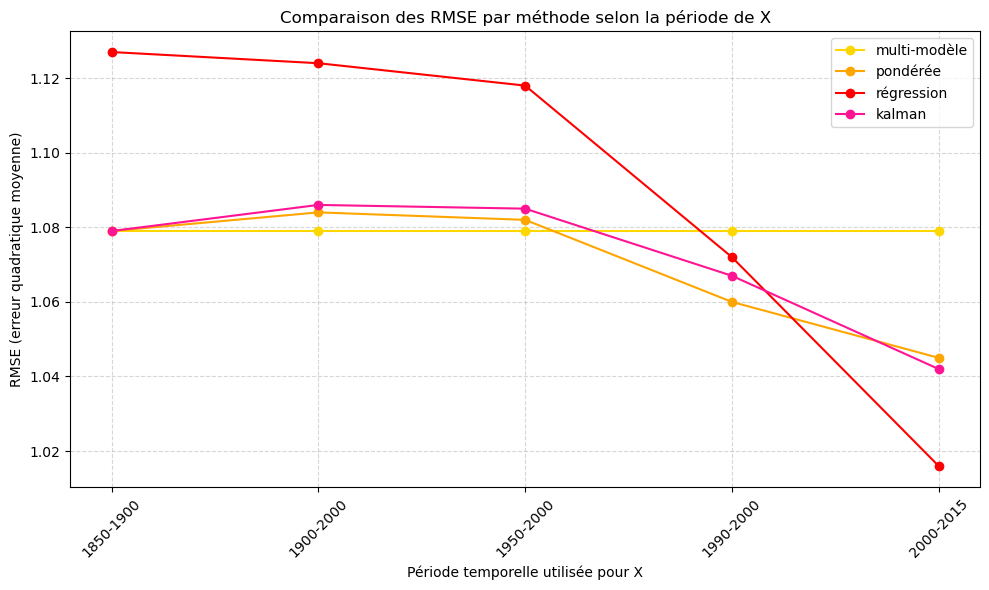

In [209]:
rmse = {
    "1850-1900": {"multi-modèle": 1.079, "pondérée": 1.079, "régression": 1.127, "kalman": 1.079},
    "1900-2000": {"multi-modèle": 1.079, "pondérée": 1.084, "régression": 1.124, "kalman": 1.086},
    "1950-2000": {"multi-modèle": 1.079, "pondérée": 1.082, "régression": 1.118, "kalman": 1.085},
    "1990-2000": {"multi-modèle": 1.079, "pondérée": 1.060, "régression": 1.072, "kalman": 1.067},
    "2000-2015": {"multi-modèle": 1.079, "pondérée": 1.045, "régression": 1.016, "kalman": 1.042},
}

# Extraire les fenêtres et les méthodes
windows = list(rmse.keys())
methods = list(next(iter(rmse.values())).keys())

# Préparer les données pour le tracé
rmse_data = {method: [rmse[window][method] for window in windows] for method in methods}


custom_colors = ['gold', 'orange', 'red', 'deeppink']

# Graphique
plt.figure(figsize=(10, 6))
for method, color in zip(methods, custom_colors):
    plt.plot(windows, rmse_data[method], marker='o', label=method, color=color)

plt.title("Comparaison des RMSE par méthode selon la période de X")
plt.ylabel("RMSE (erreur quadratique moyenne)")
plt.xlabel("Période temporelle utilisée pour X")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comment l'utilisation d'une autre variable prédictrice que la température peut permettre d’améliorer les résultats ? Lesquelles seraient pertinentes ? Trouvez 3 variables qui auraient un intérêt.**

cf. Rapport PDF

**Plutôt que prendre la moyenne, utilisez la tendance comme prédicteur. La tendance est définie comme la pente trouvée par régression linéaire sur la série temporelle d'un modèle climatique.**

In [211]:
# Création du prédicteur basé sur la pente

def compute_slope(Y_data, years, start, end):
    """Calcule la pente de chaque série temporelle sur [start, end]."""
    mask = (years >= start) & (years <= end)
    x = years[mask].reshape(-1, 1)

    slopes = []
    for series in Y_data:
        y = series[mask]
        model = LinearRegression().fit(x, y)
        slopes.append(model.coef_[0])

    return np.array(slopes).reshape(-1, 1)

In [213]:
# Période pour la régression linéaire (peut être modifiée)
start_year, end_year = 1950, 2000
years = np.arange(1850, 2022)

# Génération du prédicteur "tendance"
X_simu_slope = compute_slope(data_simulated_past, years, start_year, end_year)
X_obs_slope = compute_slope(data_observed_past, years, start_year, end_year)

In [215]:
# Fonction pour calculer la pente (tendance) sur une période donnée
def compute_slope(Y_data, years, start, end):
    mask = (years >= start) & (years <= end)
    x = years[mask].reshape(-1, 1)

    slopes = []
    for series in Y_data:
        y = series[mask]
        model = LinearRegression().fit(x, y)
        slopes.append(model.coef_[0])

    return np.array(slopes).reshape(-1, 1)

# Choix de la période temporelle pour calculer la tendance
start_year, end_year = 1950, 2000  # on peut modifier selon la période que l'on souhaite
years = np.arange(1850, 2022)

# Génération du prédicteur basé sur la pente
X_simu_slope = compute_slope(data_simulated_past, years, start_year, end_year)
X_obs_slope = compute_slope(data_observed_past, years, start_year, end_year)

# Validation croisée LOO + incertitude
errors_mm, errors_pw, errors_lr, errors_kalman = [], [], [], []

for i in range(M):
    X_train = np.delete(X_simu_slope, i, axis=0)
    Y_train = np.delete(Y_simu, i, axis=0)
    X_val = X_simu_slope[i, 0]
    Y_val = Y_simu[i, 0]

    # Moyenne multi-modèle
    y_hat_mm = Y_train.mean()
    errors_mm.append((Y_val - y_hat_mm) ** 2)

    # Moyenne pondérée
    D_i = np.abs(X_train - X_val)
    num = np.exp(-D_i**2 / sigma_D**2).flatten()
    denom = np.array([
        1 + np.sum(np.exp(-np.delete(np.abs(X_train[i] - X_train).flatten() ** 2, i) / sigma_S**2))
        for i in range(M - 1)
    ])
    w = num / denom
    w /= w.sum()
    y_hat_pw = np.sum(w.flatten() * Y_train.flatten())
    errors_pw.append((Y_val - y_hat_pw) ** 2)

    # Régression linéaire
    lr = LinearRegression().fit(X_train, Y_train)
    y_hat_lr = lr.predict([[X_val]])[0, 0]
    errors_lr.append((Y_val - y_hat_lr) ** 2)

    # Kalman one-step
    mu_X, mu_Y = X_train.mean(), Y_train.mean()
    sigma_X, sigma_Y = X_train.std(), Y_train.std()
    rho = np.corrcoef(X_train.flatten(), Y_train.flatten())[0, 1]
    y_hat_kalman = mu_Y + (rho * sigma_Y / (sigma_Y**2 + sigma_B**2)) * (X_val - mu_X)
    errors_kalman.append((Y_val - y_hat_kalman) ** 2)

# Calcul des RMSE
rmse = lambda e: np.sqrt(np.mean(e))
print("\n[RMSE - Tendance sur {}-{}]".format(start_year, end_year))
print(f" - Moyenne multi-modèle      : {rmse(errors_mm):.3f}")
print(f" - Moyenne pondérée          : {rmse(errors_pw):.3f}")
print(f" - Régression linéaire       : {rmse(errors_lr):.3f}")
print(f" - Kalman one-step           : {rmse(errors_kalman):.3f}")

# Calcul des incertitudes pour cette tendance
# Moyenne multi-modèle
y_hat_mm = Y_simu.mean()
unc_mm = np.std(Y_simu)

# Moyenne pondérée
D_i = np.abs(X_simu_slope - X_obs_slope)
num = np.exp(-D_i**2 / sigma_D**2).flatten()
denom = np.array([
    1 + np.sum(np.exp(-np.delete(np.abs(X_simu_slope[i] - X_simu_slope).flatten() ** 2, i) / sigma_S**2))
    for i in range(M)
])
w = num / denom
w /= w.sum()
y_hat_pw = np.sum(w.flatten() * Y_simu.flatten())
unc_pw = np.sqrt(np.sum(w.flatten() * (Y_simu.flatten() - y_hat_pw) ** 2))

# Régression linéaire
lr = LinearRegression().fit(X_simu_slope, Y_simu)
X_mean = X_simu_slope.mean()
s_squared = np.mean((Y_simu - lr.predict(X_simu_slope))**2)
unc_lr = np.sqrt(s_squared * (
    1 + 1/M + ((X_obs_slope[0,0] - X_mean)**2 / np.sum((X_simu_slope - X_mean)**2))
))

# Kalman
mu_X, mu_Y = X_simu_slope.mean(), Y_simu.mean()
sigma_X, sigma_Y = X_simu_slope.std(), Y_simu.std()
rho = np.corrcoef(X_simu_slope.flatten(), Y_simu.flatten())[0, 1]
ratio = sigma_B**2 / sigma_X**2
unc_kalman = np.sqrt((1 - (rho**2 / (1 + ratio))) * sigma_Y**2)

# Affichage
print("\n[Incertitude - Tendance sur {}-{}]".format(start_year, end_year))
print(f" - Moyenne multi-modèle      : {unc_mm:.3f}")
print(f" - Moyenne pondérée          : {unc_pw:.3f}")
print(f" - Régression linéaire       : {unc_lr:.3f}")
print(f" - Kalman one-step           : {unc_kalman:.3f}")

# Calcul des prédictions Ŷ pour chaque méthode sur la tendance
predictions_slope = {}

# Moyenne multi-modèle
y_hat_mm = Y_simu.mean()

# Moyenne pondérée
D_i = np.abs(X_simu_slope - X_obs_slope)
num = np.exp(-D_i**2 / sigma_D**2).flatten()
denom = np.array([
    1 + np.sum(np.exp(-np.delete(np.abs(X_simu_slope[i] - X_simu_slope).flatten() ** 2, i) / sigma_S**2))
    for i in range(M)
])
w = num / denom
w /= w.sum()
y_hat_pw = np.sum(w.flatten() * Y_simu.flatten())

# Régression linéaire
lr = LinearRegression().fit(X_simu_slope, Y_simu)
y_hat_lr = lr.predict(X_obs_slope.reshape(1, -1))[0, 0]

# Kalman
mu_X, mu_Y = X_simu_slope.mean(), Y_simu.mean()
sigma_X, sigma_Y = X_simu_slope.std(), Y_simu.std()
rho = np.corrcoef(X_simu_slope.flatten(), Y_simu.flatten())[0, 1]
y_hat_kalman = mu_Y + (rho * sigma_Y / (sigma_Y**2 + sigma_B**2)) * (X_obs_slope[0, 0] - mu_X)

# Stockage
predictions_slope = {
    "multi-modèle": y_hat_mm,
    "pondérée": y_hat_pw,
    "régression": y_hat_lr,
    "kalman": y_hat_kalman
}

# Affichage
print("\n[Prédictions Ŷ - Tendance sur {}-{}]".format(start_year, end_year))
for method, yhat in predictions_slope.items():
    print(f" - {method} : Ŷ = {yhat:.3f}")


[RMSE - Tendance sur 1950-2000]
 - Moyenne multi-modèle      : 1.079
 - Moyenne pondérée          : 1.079
 - Régression linéaire       : 1.038
 - Kalman one-step           : 1.079

[Incertitude - Tendance sur 1950-2000]
 - Moyenne multi-modèle      : 1.036
 - Moyenne pondérée          : 1.036
 - Régression linéaire       : 0.972
 - Kalman one-step           : 1.036

[Prédictions Ŷ - Tendance sur 1950-2000]
 - multi-modèle : Ŷ = 5.221
 - pondérée : Ŷ = 5.221
 - régression : Ŷ = 5.442
 - kalman : Ŷ = 5.222


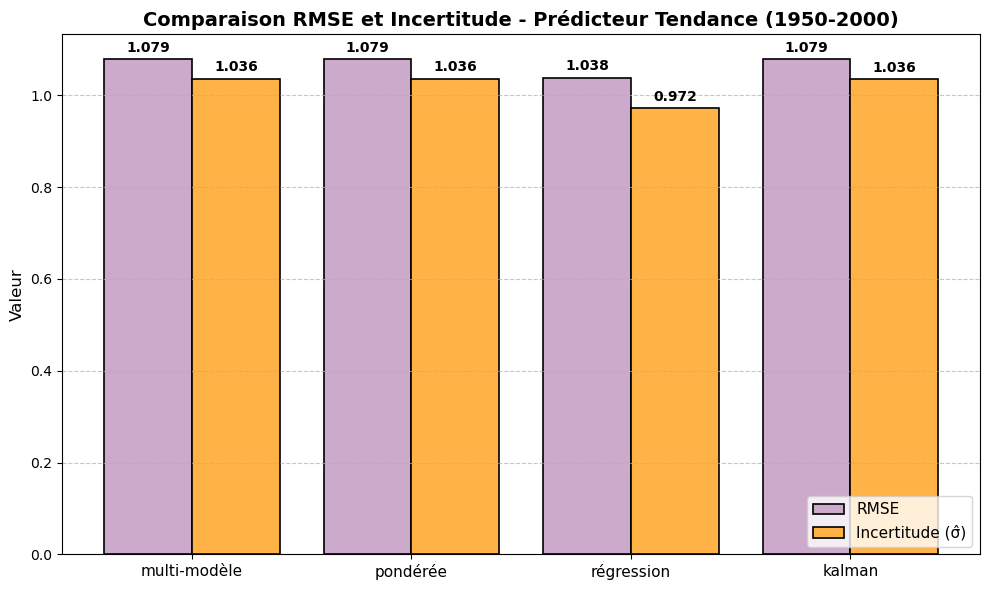

In [217]:
# Regrouper les résultats
rmse_tendance = {
    "multi-modèle": rmse(errors_mm),
    "pondérée": rmse(errors_pw),
    "régression": rmse(errors_lr),
    "kalman": rmse(errors_kalman),
}

uncertainty_tendance = {
    "multi-modèle": unc_mm,
    "pondérée": unc_pw,
    "régression": unc_lr,
    "kalman": unc_kalman,
}

# Graphique
methods = list(rmse_tendance.keys())
x = range(len(methods))

plt.figure(figsize=(10, 6))

# Couleurs
colors_rmse = '#CBAACB'
colors_unc = '#FFB347'

# Barres RMSE
bar1 = plt.bar(x, [rmse_tendance[m] for m in methods], width=0.4, label='RMSE',
               align='center', color=colors_rmse, edgecolor='black', linewidth=1.2)

# Barres Incertitude
bar2 = plt.bar([i + 0.4 for i in x], [uncertainty_tendance[m] for m in methods], width=0.4, label='Incertitude (σ̂)',
               align='center', color=colors_unc, edgecolor='black', linewidth=1.2)

# Personnalisation
plt.xticks([i + 0.2 for i in x], methods, fontsize=11)
plt.ylabel("Valeur", fontsize=12)
plt.title(f"Comparaison RMSE et Incertitude - Prédicteur Tendance ({start_year}-{end_year})", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Légende en bas à droite
plt.legend(loc='lower right', fontsize=11, frameon=True)

# Ajouter les valeurs exactes au-dessus des barres
for i, method in enumerate(methods):
    plt.text(i, rmse_tendance[method] + 0.01, f"{rmse_tendance[method]:.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(i + 0.4, uncertainty_tendance[method] + 0.01, f"{uncertainty_tendance[method]:.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#### 2.7.2  Multivarié

**Jusqu'ici nous travaillons en univarié : un seul prédicteur pour estimer $\hat{Y}$. Une possibilité d'extension est de travailler en multivarié, en utilisant par exemple chaque année passée comme prédicteur. Etant donné qu’il y a des observations entre 1850 à 2021, cela fait potentiellement 172 prédicteurs. Mais une plage plus restreinte peut être bien sur sélectionnée.**

**Remarque : l’approche multivariée consiste plus communément a prendre comme prédicteurs différentes métriques (température globale, concentration en gaz a effet de serre, couverture nuageuse, etc), mais dans notre cas de figure nous allons essayer en prenant comme prédicteurs les différentes années pour une seule métrique, à savoir la température globale.**

Extraction de prédicteurs multivariés

In [219]:
# Exemple : plage 1990–2015
start_multi, end_multi = 1990, 2015
years = np.arange(1850, 2022)
mask = (years >= start_multi) & (years <= end_multi)

# X multivarié : température pour chaque année entre 1990 et 2015
X_simu_multi = data_simulated_past[:, mask]
X_obs_multi  = data_observed_past[:, mask]

**Formule de l’incertitude pour la régression multivariée**

L'incertitude sur la prédiction $\hat{Y}$ est estimée par :

$$
\hat{\sigma} = \sqrt{s^2 \left(1 + \frac{1}{M} + (x_0 - \bar{X})^T (X^T X)^{-1} (x_0 - \bar{X}) \right)}
$$

où :

- $x_0$ est le vecteur d’observation (X\_obs\_multi)  
- $\bar{X}$ est la moyenne ligne par ligne de X\_simu\_multi  
- $s^2$ est l’erreur quadratique moyenne des résidus sur l’échantillon d’apprentissage


Régression multivariée simple (avec Leave-One-Out)

In [221]:
# Régression multivariée (déjà fait) avec Leave-One-Out
errors_lr_multi = []

for i in range(M):
    X_train = np.delete(X_simu_multi, i, axis=0)
    Y_train = np.delete(Y_simu, i, axis=0)
    X_val   = X_simu_multi[i].reshape(1, -1)
    Y_val   = Y_simu[i, 0]

    model = LinearRegression().fit(X_train, Y_train)
    y_pred = model.predict(X_val)[0, 0]
    errors_lr_multi.append((Y_val - y_pred) ** 2)

rmse_multi = np.sqrt(np.mean(errors_lr_multi))
print(f"Régression multivariée simple (1990–2015) : RMSE = {rmse_multi:.3f}")

# Incertitude analytique sur la prédiction réelle (X_obs_multi)
X_mean = X_simu_multi.mean(axis=0)
squared_errors = (Y_simu - LinearRegression().fit(X_simu_multi, Y_simu).predict(X_simu_multi))**2
s_squared = np.mean(squared_errors)

X_centered = X_obs_multi - X_mean.reshape(1, -1)
XtX_inv = np.linalg.inv((X_simu_multi - X_mean).T @ (X_simu_multi - X_mean))

uncertainty = np.sqrt(s_squared * (1 + 1/M + (X_centered @ XtX_inv @ X_centered.T)[0, 0] ))

print(f"Incertitude de la prédiction multivariée simple : {uncertainty:.3f}")

Régression multivariée simple (1990–2015) : RMSE = 1.774
Incertitude de la prédiction multivariée simple : 0.000


**Adaptez certaines de ces méthodes, proposer et testez une diversité de nouvelles méthodes de votre choix pour pouvoir réaliser la projection en multivarié. Certaines de ces méthodes pourraient être non linéaire (Random Forest).**

On va donc proposer 3 nouvelles méthodes :
- Régression Ridge (linéaire régularisée)
- Régression PLS (Partial Least Squares)
- Régression Random Forest (non linéaire)

On commence par la Régression Ridge (linéaire régularisée)

In [83]:
# Validation croisée Leave-One-Out avec Ridge
errors_ridge = []

for i in range(M):
    X_train = np.delete(X_simu_multi, i, axis=0)
    Y_train = np.delete(Y_simu, i, axis=0)
    X_val   = X_simu_multi[i].reshape(1, -1)
    Y_val   = Y_simu[i, 0]

    model = RidgeCV(alphas=np.logspace(-3, 3, 20), store_cv_values=True).fit(X_train, Y_train.ravel())
    y_pred = model.predict(X_val)[0]
    errors_ridge.append((Y_val - y_pred)**2)

# Réentraîner RidgeCV sur tout l'échantillon
ridge_full = RidgeCV(alphas=np.logspace(-3, 3, 20)).fit(X_simu_multi, Y_simu.ravel())

X_mean = X_simu_multi.mean(axis=0)
s_squared_ridge = np.mean((Y_simu - ridge_full.predict(X_simu_multi).reshape(-1, 1))**2)

X_centered = X_obs_multi - X_mean.reshape(1, -1)
I = np.identity(X_simu_multi.shape[1])
XtX_inv_ridge = np.linalg.inv((X_simu_multi - X_mean).T @ (X_simu_multi - X_mean) + ridge_full.alpha_ * I)

rmse_ridge = np.sqrt(np.mean(errors_ridge))
print(f"Ridge multivariée (1990–2015) : RMSE = {rmse_ridge:.3f}")

unc_ridge = np.sqrt(s_squared_ridge * (1 + 1/M + (X_centered @ XtX_inv_ridge @ X_centered.T)[0, 0]))
print(f"Incertitude RidgeCV : {unc_ridge:.3f}")

Ridge multivariée (1990–2015) : RMSE = 1.240
Incertitude RidgeCV : 0.800


Ensuite nous faisons la Régression PLS (Partial Least Squares)

In [79]:
errors_pls = []

for i in range(M):
    X_train = np.delete(X_simu_multi, i, axis=0)
    Y_train = np.delete(Y_simu, i, axis=0)
    X_val   = X_simu_multi[i].reshape(1, -1)
    Y_val   = Y_simu[i, 0]

    model = PLSRegression(n_components=5).fit(X_train, Y_train)
    y_pred = model.predict(X_val)[0, 0]
    errors_pls.append((Y_val - y_pred)**2)

# Réentraîner PLS sur tout l'échantillon
pls_full = PLSRegression(n_components=5).fit(X_simu_multi, Y_simu)

X_scores = pls_full.transform(X_simu_multi)
X_obs_score = pls_full.transform(X_obs_multi)
X_score_mean = X_scores.mean(axis=0)

s_squared_pls = np.mean((Y_simu - pls_full.predict(X_simu_multi))**2)

X_centered_score = X_obs_score - X_score_mean.reshape(1, -1)
XtX_inv_pls = np.linalg.inv((X_scores - X_score_mean).T @ (X_scores - X_score_mean))

rmse_pls = np.sqrt(np.mean(errors_pls))
print(f"Régression PLS (1990–2015) : RMSE = {rmse_pls:.3f}")

unc_pls = np.sqrt(s_squared_pls * (1 + 1/M + (X_centered_score @ XtX_inv_pls @ X_centered_score.T)[0, 0]))
print(f"Incertitude PLS : {unc_pls:.3f}")

Régression PLS (1990–2015) : RMSE = 1.556
Incertitude PLS : 0.439


Pour finir voici la Régression Random Forest (non linéaire)

In [75]:
errors_rf = []

for i in range(M):
    X_train = np.delete(X_simu_multi, i, axis=0)
    Y_train = np.delete(Y_simu, i, axis=0)
    X_val   = X_simu_multi[i].reshape(1, -1)
    Y_val   = Y_simu[i, 0]

    model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
    model.fit(X_train, Y_train.ravel())
    y_pred = model.predict(X_val)[0]
    errors_rf.append((Y_val - y_pred)**2)

rmse_rf = np.sqrt(np.mean(errors_rf))
print(f"Random Forest (1990–2015) : RMSE = {rmse_rf:.3f}")

y_preds = [tree.predict(X_obs_multi.reshape(1, -1))[0] for tree in model.estimators_]
unc_rf = np.std(y_preds)
print(f"Incertitude Random Forest : {unc_rf:.3f}")

Random Forest (1990–2015) : RMSE = 0.805
Incertitude Random Forest : 0.647


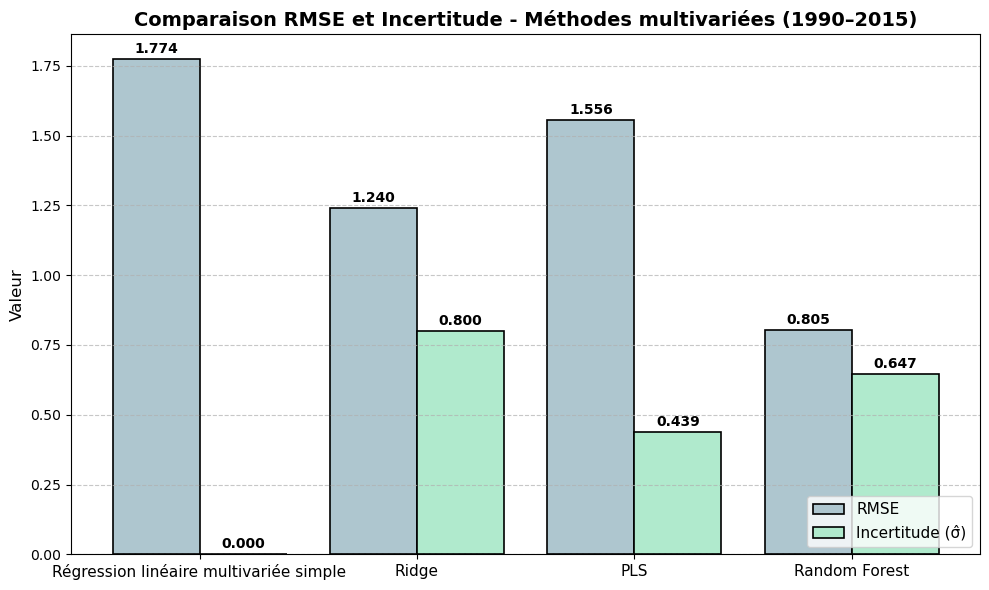

In [93]:
# Dictionnaires des résultats
rmse_multivarie = {
    "Régression linéaire multivariée simple": rmse_multi,
    "Ridge": rmse_ridge,
    "PLS": rmse_pls,
    "Random Forest": rmse_rf,
}

uncertainty_multivarie = {
    "Régression linéaire multivariée simple": uncertainty,
    "Ridge": unc_ridge,
    "PLS": unc_pls,
    "Random Forest": unc_rf,
}

# Graphique
methods = list(rmse_multivarie.keys())
x = range(len(methods))

plt.figure(figsize=(10, 6))

# Couleurs
colors_rmse = '#AEC6CF'
colors_unc = '#B0EACD'

# Barres RMSE
bar1 = plt.bar(x, [rmse_multivarie[m] for m in methods], width=0.4, label='RMSE',
               align='center', color=colors_rmse, edgecolor='black', linewidth=1.2)

# Barres Incertitude
bar2 = plt.bar([i + 0.4 for i in x], [uncertainty_multivarie[m] for m in methods], width=0.4, label='Incertitude (σ̂)',
               align='center', color=colors_unc, edgecolor='black', linewidth=1.2)

# Personnalisation
plt.xticks([i + 0.2 for i in x], methods, fontsize=11)
plt.ylabel("Valeur", fontsize=12)
plt.title("Comparaison RMSE et Incertitude - Méthodes multivariées (1990–2015)",
          fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Légende
plt.legend(loc='lower right', fontsize=11, frameon=True)

# Ajouter les valeurs au-dessus des barres
for i, method in enumerate(methods):
    plt.text(i, rmse_multivarie[method] + 0.01, f"{rmse_multivarie[method]:.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(i + 0.4, uncertainty_multivarie[method] + 0.01, f"{uncertainty_multivarie[method]:.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Comment avez vous paramétré ces méthodes ? Comparez les avec les méthodes précédentes, en terme d'hypothèses et de résultats. Quel problème peut poser cette approche multidimensionnelle ? Quel est le risque à apprendre une fonction de régression dans un espace à grande dimension ? Expliquez 3 solutions différentes pour réduire le nombre de variable (mots clés pour la recherche internet : feature extraction, feature selection).**

cf. Rapport PDF

**Réalisez une analyse en composante principale sur ces données multivariées. Les données sont elles très corrélées ? Combien faut-il de composantes principales pour les expliquer (sélectionner le critère le plus approprié) ? Appliquez les différentes méthodes de réduction du nombre de variable pour n’obtenir qu’une seule variable. Testez les méthodes univarié vu précédemment dessus, et analyser les résultats et performances.**

D'après les résultats suivant, on remarque qu'il est nécessaire de faire une ACP.

En effet, dans cette partie du projet, nous avons souhaité passer d'une approche univariée à une approche multivariée, en utilisant non plus un seul prédicteur (ex. la moyenne ou la tendance des températures passées), mais plusieurs années de température observée comme prédicteurs simultanés.

Cependant, cette approche multivariée présente un problème majeur :
- La dimension du vecteur de prédicteurs est élevée
- Le nombre d'observations disponibles reste faible (seulement 21 modèles climatiques dans notre cas).

Cela crée une situation :
- Plus le nombre de variables est grand par rapport au nombre d'échantillons, plus le risque de surapprentissage est élevé.
- Le modèle peut s'adapter parfaitement aux données d'apprentissage, mais échouer à généraliser (très mauvais RMSE sur des données nouvelles).

Pour résoudre ce problème, nous appliquons une Analyse en Composantes Principales (ACP), qui a plusieurs avantages :
- **Réduction de dimension** : l'ACP permet de projeter les données multivariées dans un espace de plus faible dimension**, tout en conservant l'essentiel de la variance des données.
- **Décorrélation des variables** : les composantes principales sont des combinaisons linéaires orthogonales, ce qui simplifie la modélisation statistique (hypothèses de régression classique mieux respectées).
- **Amélioration de la stabilité des prédictions** : en ne gardant que les composantes expliquant l'essentiel de la variance supérieur à 75%, 80% ou 95%), nous limitons le bruit et augmentons la robustesse du modèle.

En résumé, l'ACP est indispensable ici car elle permet :
- De réduire le risque de surapprentissage,
- De garder l'information principale contenue dans les températures passées,
- D'améliorer la qualité et la fiabilité des prédictions de (réduction de dimension).

On va regarder si les variables sont corrélées :

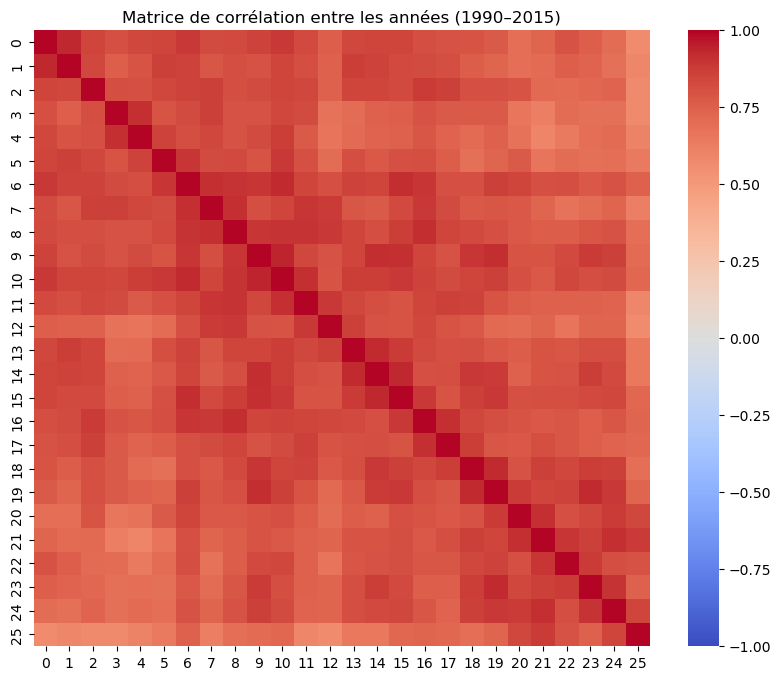

In [119]:
# Matrice de corrélation
corr_matrix = np.corrcoef(X_simu_multi.T)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Matrice de corrélation entre les années (1990–2015)")
plt.show()

La matrice de corrélation montre que les variables (valeurs simulées pour chaque année entre 1990 et 2015) sont fortement corrélées entre elles, souvent avec des coefficients de corrélation proches de 1.
Cela s'explique par le fait qu’il s’agit de séries temporelles relativement continues (comme des températures ou d'autres grandeurs climatiques), où les valeurs d’une année sont fortement dépendantes des années voisines.
Ce fort niveau de redondance justifie l’utilisation de l’ACP, qui permet de compresser l’information sans trop de perte.

In [228]:
# ACP sur les prédicteurs simulés
pca = PCA()
X_simu_pca = pca.fit_transform(X_simu_multi)

# Choisir le nombre de composantes expliquant 95% de la variance
explained_var = np.cumsum(pca.explained_variance_ratio_)
k = np.argmax(explained_var >= 0.95) + 1
print(f"Nombre de composantes principales retenues : {k}")

# Réduction de dimension
pca = PCA(n_components=k)
X_simu_reduced = pca.fit_transform(X_simu_multi)
X_obs_reduced  = pca.transform(X_obs_multi)

# Leave-One-Out + régression
errors_pca = []

for i in range(M):
    X_train = np.delete(X_simu_reduced, i, axis=0)
    Y_train = np.delete(Y_simu, i, axis=0)
    X_val   = X_simu_reduced[i].reshape(1, -1)
    Y_val   = Y_simu[i, 0]

    model = LinearRegression().fit(X_train, Y_train)
    y_pred = model.predict(X_val)[0, 0]
    errors_pca.append((Y_val - y_pred) ** 2)

rmse_pca = np.sqrt(np.mean(errors_pca))
print(f"Régression PCA (k={k}) : RMSE = {rmse_pca:.3f}")

# Incertitude analytique sur la projection observée
X_mean = X_simu_reduced.mean(axis=0)
s_squared = np.mean((Y_simu - LinearRegression().fit(X_simu_reduced, Y_simu).predict(X_simu_reduced))**2)

X_centered = X_obs_reduced - X_mean.reshape(1, -1)
XtX_inv = np.linalg.inv((X_simu_reduced - X_mean).T @ (X_simu_reduced - X_mean))

uncertainty_pca = np.sqrt(
    s_squared * (
        1 + 1/M + (X_centered @ XtX_inv @ X_centered.T)[0, 0]
    )
)

print(f"Incertitude après ACP : {uncertainty_pca:.3f}")

Nombre de composantes principales retenues : 7
Régression PCA (k=7) : RMSE = 1.231
Incertitude après ACP : 0.805


On va regarder quelle(s) sont les compsantes principales expliquant le plus l'inertie totale pour ne garder que celle-ci, et donc ainsi pouvoir réduire le nombre de composantes principales à retenir.

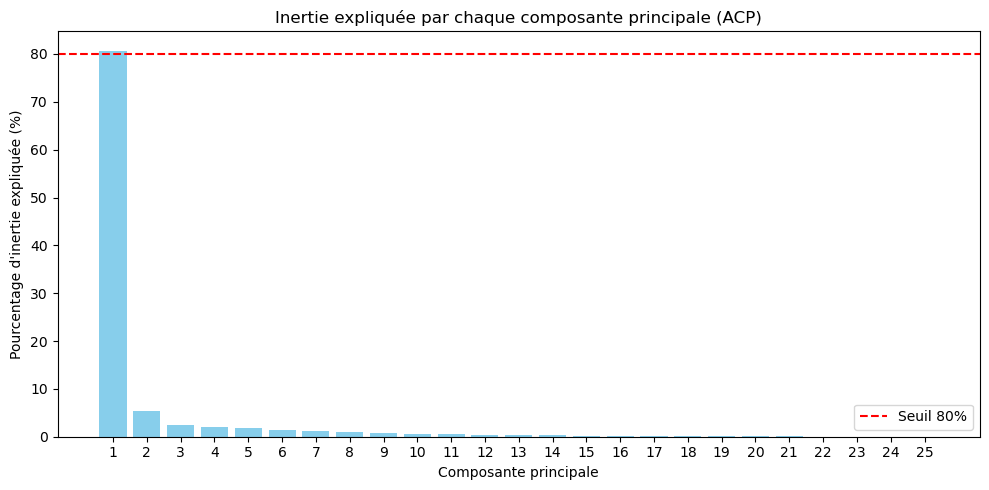

In [230]:
# ACP déjà ajustée sur X_simu_multi
pca_full = PCA()
pca_full.fit(X_simu_multi)

# Pourcentages d'inertie expliquée
explained_variance_ratio = pca_full.explained_variance_ratio_ * 100  # en %

# Barplot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue')
plt.axhline(80, color='red', linestyle='--', label='Seuil 80%')
plt.xlabel("Composante principale")
plt.ylabel("Pourcentage d'inertie expliquée (%)")
plt.title("Inertie expliquée par chaque composante principale (ACP)")
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.tight_layout()
plt.show()

On remarque que la première composante principale contient plus de 80% de l'inertie totale expliquée, alors d'après la règle de Kaiser nous gardons uniqument celle-ci pour la suite de notre analayse.

In [232]:
# Réduction à la 1ère composante uniquement
pca_1 = PCA(n_components=1)
X_simu_1 = pca_1.fit_transform(X_simu_multi)
X_obs_1 = pca_1.transform(X_obs_multi)

RMSE + Incertitude + Prévision de l'anomalie de température ($\hat{Y}$) avec uniquement la première composante principale

In [235]:
# ACP réduite à 1 composante
pca_1 = PCA(n_components=1)
X_simu_1 = pca_1.fit_transform(X_simu_multi)
X_obs_1 = pca_1.transform(X_obs_multi)

# Leave-One-Out pour la régression linéaire sur 1 composante
errors_1pc = []

for i in range(M):
    X_train = np.delete(X_simu_1, i, axis=0)
    Y_train = np.delete(Y_simu, i, axis=0)
    X_val   = X_simu_1[i].reshape(1, -1)
    Y_val   = Y_simu[i, 0]

    model = LinearRegression().fit(X_train, Y_train)
    y_pred = model.predict(X_val)[0, 0]
    errors_1pc.append((Y_val - y_pred) ** 2)

rmse_1pc = np.sqrt(np.mean(errors_1pc))
print(f"Régression PCA (1 composante) : RMSE = {rmse_1pc:.3f}")

# Calcul de l'incertitude analytique sur la projection observée
X_mean = X_simu_1.mean(axis=0)
s_squared = np.mean((Y_simu - LinearRegression().fit(X_simu_1, Y_simu).predict(X_simu_1))**2)

X_centered = X_obs_1 - X_mean.reshape(1, -1)
XtX_inv = np.linalg.inv((X_simu_1 - X_mean).T @ (X_simu_1 - X_mean))

uncertainty_1pc = np.sqrt(
    s_squared * (
        1 + 1/M + (X_centered @ XtX_inv @ X_centered.T)[0, 0]
    )
)

print(f"Incertitude avec 1 composante PCA : {uncertainty_1pc:.3f}")

Régression PCA (1 composante) : RMSE = 1.040
Incertitude avec 1 composante PCA : 0.973


In [237]:
# Conteneurs d'erreurs pour RMSE LOO
errors_mm = []
errors_pw = []
errors_lr = []
errors_kalman = []

for i in range(M):
    X_train = np.delete(X_simu_1, i, axis=0)
    Y_train = np.delete(Y_simu, i, axis=0)
    X_val   = X_simu_1[i, 0]
    Y_val   = Y_simu[i, 0]

    # Moyenne multi-modèle
    y_hat_mm = Y_train.mean()
    errors_mm.append((Y_val - y_hat_mm) ** 2)

    # Moyenne pondérée
    D_i = np.abs(X_train - X_val)
    num = np.exp(-D_i**2 / sigma_D**2).flatten()
    denom = np.array([
        1 + np.sum(np.exp(-np.delete(np.abs(X_train[i] - X_train).flatten() ** 2, i) / sigma_S**2))
        for i in range(M - 1)
    ])
    w = num / denom
    w /= w.sum()
    y_hat_pw = np.sum(w.flatten() * Y_train.flatten())
    errors_pw.append((Y_val - y_hat_pw) ** 2)

    # Régression linéaire
    lr = LinearRegression().fit(X_train, Y_train)
    y_hat_lr = lr.predict([[X_val]])[0, 0]
    errors_lr.append((Y_val - y_hat_lr) ** 2)

    # Kalman one-step
    mu_X, mu_Y = X_train.mean(), Y_train.mean()
    sigma_X, sigma_Y = X_train.std(), Y_train.std()
    rho = np.corrcoef(X_train.flatten(), Y_train.flatten())[0, 1]
    y_hat_kalman = mu_Y + (rho * sigma_Y / (sigma_Y**2 + sigma_B**2)) * (X_val - mu_X)
    errors_kalman.append((Y_val - y_hat_kalman) ** 2)

# Calcul des RMSE
rmse = lambda e: np.sqrt(np.mean(e))

print("\n[RMSE avec 1 composante principale]")
print(f" - Moyenne multi-modèle : {rmse(errors_mm):.3f}")
print(f" - Moyenne pondérée     : {rmse(errors_pw):.3f}")
print(f" - Régression linéaire  : {rmse(errors_lr):.3f}")
print(f" - Kalman one-step      : {rmse(errors_kalman):.3f}")

# Calcul des incertitudes pour chaque méthode

# Moyenne multi-modèle
unc_mm = np.std(Y_simu)

# Moyenne pondérée
D_i = np.abs(X_simu_1 - X_obs_1)
num = np.exp(-D_i**2 / sigma_D**2).flatten()
denom = np.array([
    1 + np.sum(np.exp(-np.delete(np.abs(X_simu_1[i] - X_simu_1).flatten() ** 2, i) / sigma_S**2))
    for i in range(M)
])
w = num / denom
w /= w.sum()
y_hat_pw = np.sum(w.flatten() * Y_simu.flatten())
unc_pw = np.sqrt(np.sum(w.flatten() * (Y_simu.flatten() - y_hat_pw)**2))

# Régression linéaire
X_mean = X_simu_1.mean()
s_squared = np.mean((Y_simu - LinearRegression().fit(X_simu_1, Y_simu).predict(X_simu_1))**2)
X_centered = X_obs_1 - X_mean.reshape(1, -1)
XtX_inv = np.linalg.inv((X_simu_1 - X_mean).T @ (X_simu_1 - X_mean))
unc_lr = np.sqrt(
    s_squared * (
        1 + 1/M + (X_centered @ XtX_inv @ X_centered.T)[0, 0]
    )
)

# Kalman
mu_X, mu_Y = X_simu_1.mean(), Y_simu.mean()
sigma_X, sigma_Y = X_simu_1.std(), Y_simu.std()
rho = np.corrcoef(X_simu_1.flatten(), Y_simu.flatten())[0, 1]
ratio = sigma_B**2 / sigma_X**2
unc_kalman = np.sqrt((1 - (rho**2 / (1 + ratio))) * sigma_Y**2)

print("\n[Incertitudes avec 1 composante principale]")
print(f" - Moyenne multi-modèle : {unc_mm:.3f}")
print(f" - Moyenne pondérée     : {unc_pw:.3f}")
print(f" - Régression linéaire  : {unc_lr:.3f}")
print(f" - Kalman one-step      : {unc_kalman:.3f}")

# Calcul des prédictions Ŷ pour chaque méthode (avec 1 composante ACP)
predictions_pca = {}

# Moyenne multi-modèle
y_hat_mm = Y_simu.mean()

# Moyenne pondérée
D_i = np.abs(X_simu_1 - X_obs_1)
num = np.exp(-D_i**2 / sigma_D**2).flatten()
denom = np.array([
    1 + np.sum(np.exp(-np.delete(np.abs(X_simu_1[i] - X_simu_1).flatten() ** 2, i) / sigma_S**2))
    for i in range(M)
])
w = num / denom
w /= w.sum()
y_hat_pw = np.sum(w.flatten() * Y_simu.flatten())

# Régression linéaire
lr = LinearRegression().fit(X_simu_1, Y_simu)
y_hat_lr = lr.predict(X_obs_1.reshape(1, -1))[0, 0]

# Kalman
mu_X, mu_Y = X_simu_1.mean(), Y_simu.mean()
sigma_X, sigma_Y = X_simu_1.std(), Y_simu.std()
rho = np.corrcoef(X_simu_1.flatten(), Y_simu.flatten())[0, 1]
y_hat_kalman = mu_Y + (rho * sigma_Y / (sigma_Y**2 + sigma_B**2)) * (X_obs_1[0, 0] - mu_X)

# Stockage
predictions_pca = {
    "multi-modèle": y_hat_mm,
    "pondérée": y_hat_pw,
    "régression": y_hat_lr,
    "kalman": y_hat_kalman
}

# Affichage
print("\n[Prédictions Ŷ - PCA 1 composante]")
for method, yhat in predictions_pca.items():
    print(f" - {method} : Ŷ = {yhat:.3f}")


[RMSE avec 1 composante principale]
 - Moyenne multi-modèle : 1.079
 - Moyenne pondérée     : 1.017
 - Régression linéaire  : 1.040
 - Kalman one-step      : 1.035

[Incertitudes avec 1 composante principale]
 - Moyenne multi-modèle : 1.036
 - Moyenne pondérée     : 0.712
 - Régression linéaire  : 0.973
 - Kalman one-step      : 0.952

[Prédictions Ŷ - PCA 1 composante]
 - multi-modèle : Ŷ = 5.221
 - pondérée : Ŷ = 5.386
 - régression : Ŷ = 5.354
 - kalman : Ŷ = 5.375


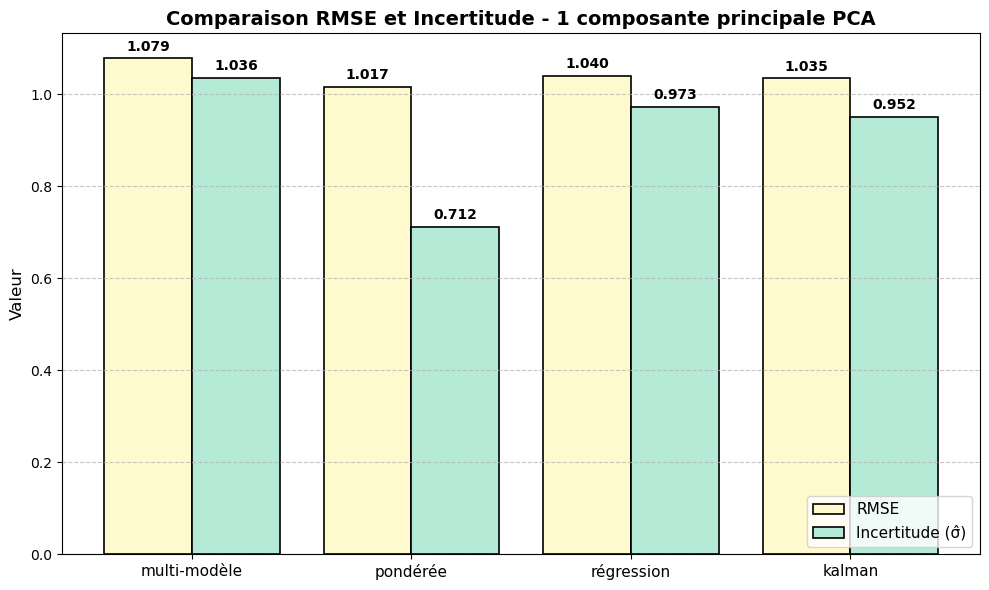

In [239]:
# Données
rmse_1pc = {
    "multi-modèle": 1.079,
    "pondérée": 1.017,
    "régression": 1.040,
    "kalman": 1.035,
}

uncertainty_1pc = {
    "multi-modèle": 1.036,
    "pondérée": 0.712,
    "régression": 0.973,
    "kalman": 0.952,
}

# Graphique
methods = list(rmse_1pc.keys())
x = range(len(methods))

plt.figure(figsize=(10, 6))

# Couleurs
colors_rmse = '#FFFACD'
colors_unc = '#B5EAD7'

# Barres RMSE
bar1 = plt.bar(x, [rmse_1pc[m] for m in methods], width=0.4, label='RMSE',
               align='center', color=colors_rmse, edgecolor='black', linewidth=1.2)

# Barres Incertitude
bar2 = plt.bar([i + 0.4 for i in x], [uncertainty_1pc[m] for m in methods], width=0.4, label='Incertitude (σ̂)',
               align='center', color=colors_unc, edgecolor='black', linewidth=1.2)

# Personnalisation
plt.xticks([i + 0.2 for i in x], methods, fontsize=11)
plt.ylabel("Valeur", fontsize=12)
plt.title("Comparaison RMSE et Incertitude - 1 composante principale PCA", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Légende en bas à droite
plt.legend(loc='lower right', fontsize=11, frameon=True)

# Ajouter les valeurs exactes au-dessus des barres
for i, method in enumerate(methods):
    plt.text(i, rmse_1pc[method] + 0.01, f"{rmse_1pc[method]:.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(i + 0.4, uncertainty_1pc[method] + 0.01, f"{uncertainty_1pc[method]:.3f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Interprétation des résultats + Conclusion**

cf. Rapport PDF